In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Luna16/candidates_V2.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
    # you have to loop through the document to get each data
      if item[4] == '1':
        count+=1
print(count)

1557


In [ ]:
import csv

with open("/content/drive/MyDrive/Luna16/candidates_V2.csv", mode="r") as old_file:
    reader_obj = csv.reader(old_file) #read the current csv file

    with open("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv", mode="w") as new_file:
        writer_obj = csv.writer(new_file, delimiter=",") # Writes to the new CSV file 

        for data in reader_obj:
          if data[4] == '1':
            #loop through the read data and write each row in new_demo_csv.csv
            writer_obj.writerow(data)

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
      count+=1
    # you have to loop through the document to get each data
      # if item[4] == '1':
      #   count+=1
print(count)

1557


In [ ]:
pip install SimpleITK 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

In [ ]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpy_image = sitk.GetArrayFromImage(itkimage)
    
    numpy_origin = np.array(list(reversed(itkimage.GetOrigin())))
    # size of pixels
    numpy_spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpy_image, numpy_origin, numpy_spacing

In [ ]:
load_itk_image("/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd")

(array([[[-1020, -1008,  -982, ...,  -950,  -977, -1006],
         [-1013, -1016,  -997, ...,  -965,  -978,  -980],
         [-1002, -1013, -1017, ...,  -966,  -969,  -973],
         ...,
         [ -965,  -953,  -897, ...,  -415,  -579,  -736],
         [-1000,  -917,  -860, ...,  -913,  -968,  -994],
         [ -936,  -840,  -877, ..., -1012, -1016, -1024]],
 
        [[ -992, -1001,  -973, ...,  -975,  -982,  -996],
         [ -985,  -979,  -972, ...,  -950,  -993, -1015],
         [-1019,  -998,  -969, ...,  -989, -1004, -1015],
         ...,
         [ -895,  -894,  -875, ...,  -504,  -621,  -783],
         [ -908,  -865,  -824, ...,  -967, -1017,  -987],
         [ -876,  -814,  -844, ..., -1024, -1024, -1024]],
 
        [[ -972,  -978,  -988, ..., -1008, -1005, -1013],
         [ -955,  -964,  -970, ...,  -989,  -979,  -978],
         [ -962,  -963,  -954, ...,  -980,  -989,  -997],
         ...,
         [ -981,  -842,  -805, ...,  -443,  -673,  -944],
         [ -905,  -812, 

In [ ]:
def readcsv(filename):
    lines = []
    with open(filename, "rt") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

In [ ]:
# world coordinates = real-life, voxel = in arrays
def world_to_voxel(world_coord, origin, spacing):
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

In [ ]:
def normalize_planes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1.
    npzarray[npzarray < 0] = 0.
    return npzarray

In [ ]:
def image_details(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(numpy_image.shape)
    print(numpy_origin)
    print(numpy_spacing)

In [ ]:
image_details('/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd')

(194, 512, 512)
[-438.4     -311.67773 -157.67773]
[1.79999995 0.64453125 0.64453125]


In [ ]:
def visualize_slice(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(len(numpy_image), numpy_origin, numpy_spacing, int(numpy_image.shape[0]/2))
    patch = numpy_image[int(numpy_image.shape[0]/2),
                        0:512,
                        0:512]
    plt.imshow(patch, cmap='gray')
    plt.show()

194 [-438.4     -311.67773 -157.67773] [1.79999995 0.64453125 0.64453125] 97


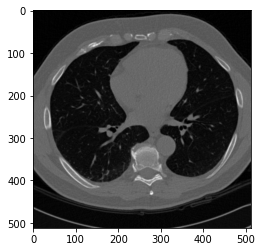

In [ ]:
visualize_slice('/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd')

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860

In [ ]:
import pandas as pd

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Luna16/candidates_V2.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
    # you have to loop through the document to get each data
      if item[4] == '0':
        count+=1
print(count)

753418


In [ ]:
import csv

with open("/content/drive/MyDrive/Luna16/candidates_V2.csv", mode="r") as old_file:
    reader_obj = csv.reader(old_file) #read the current csv file

    with open("/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv", mode="w") as new_file:
        writer_obj = csv.writer(new_file, delimiter=",") # Writes to the new CSV file 

        for data in reader_obj:
          if data[4] == '0':
            #loop through the read data and write each row in new_demo_csv.csv
            writer_obj.writerow(data)

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
      count+=1
    # you have to loop through the document to get each data
      # if item[4] == '1':
      #   count+=1
print(count)

753418


In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]
    candidate_path = '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv'  
    cands = readcsv(candidate_path)
    
    for cand in cands[low:high]:
        print(cand)
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 96
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


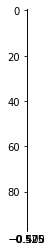

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


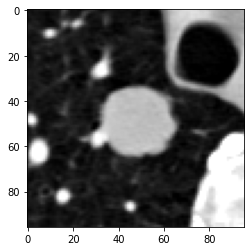

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


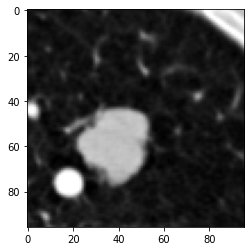

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


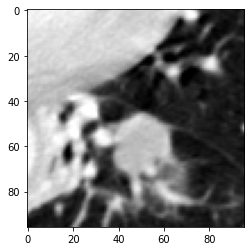

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


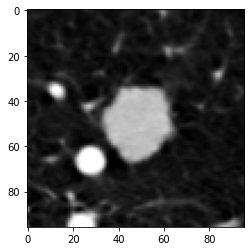

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


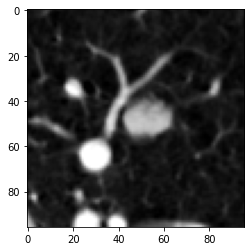

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


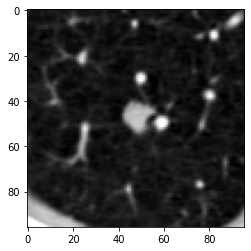

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


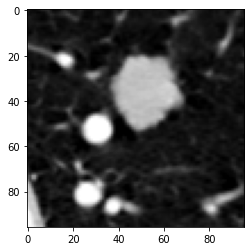

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


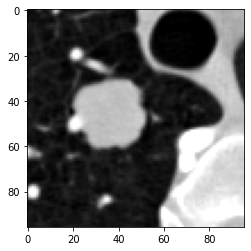

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


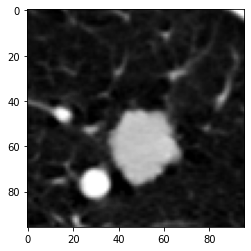

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


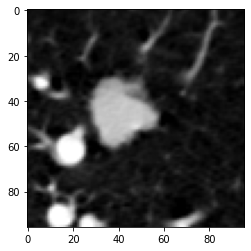

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


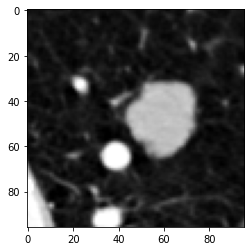

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


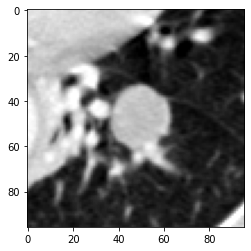

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


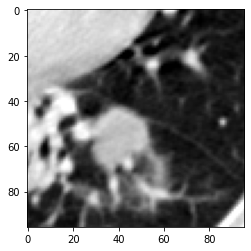

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


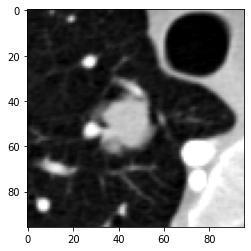

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


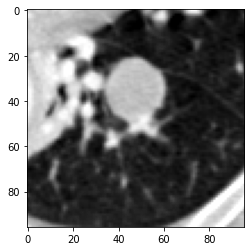

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


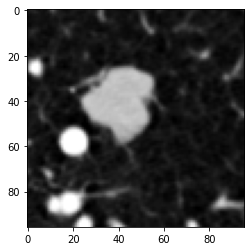

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
[22, 23, 24]
low: 22
high: 24
['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '96.28467267', '19.03486907', '-88.47844082', '1']
[-88.47844082  19.03486907  96.28467267]
[122.40862367 278.14966583 343.95307365]
[[0.80642857 0.78571429 0.77785714 ... 0.63142857 0.62285714 0.63714286]
 [0.82071429 0.805      0.78571429 ... 0.62285714 0.61857143 0.62      ]
 [0.80071429 0.81142857 0.81357143 ... 0.63714286 0.63285714 0.61714286]
 ...
 [0.13142857 0.11285714 0.10642857 ... 0.74357143 0.725      0.73357143]
 [0.08857143 0.06428571 0.06428571 ... 0.71714286 0.72857143 0.74285714]
 [0.07857143 0.08214286 0.08571429 ... 0.74785714 0.73785714 0.74214286]]


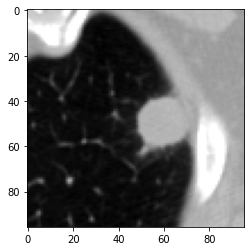

['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '106.18', '12.61', '-96.81', '1']
[-96.81  12.61 106.18]
[119.076      270.67345455 355.46763636]
[[1.         0.83714286 0.65357143 ... 0.62785714 0.635      0.625     ]
 [1.         0.98928571 0.76       ... 0.62571429 0.635      0.62428571]
 [1.         1.         0.86714286 ... 0.63642857 0.63642857 0.62285714]
 ...
 [0.05142857 0.05214286 0.07       ... 0.71285714 0.72071429 0.73214286]
 [0.06071429 0.06285714 0.06928571 ... 0.73571429 0.73857143 0.74714286]
 [0.06785714 0.06285714 0.06785714 ... 0.71142857 0.71071429 0.72642857]]


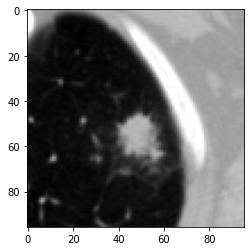

count: 5
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
[25]
low: 25
high: 25
count: 6
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
[26]
low: 26
high: 26
count: 7
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774
[27]
low: 27
high: 27
count: 8
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
[28, 29]
low: 28
high: 29
['1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949', '-70.748125', '67.2790625', '-160.9525', '1']
[-160.9525      67.2790625  -70.748125 ]
[ 89.438  342.1172 165.4424]
[[0.81285714 0.76       0.86714286 ... 0.70357143 0.72928571 0.78928571]
 [0.82714286 0.78071429 0.83642857 ... 0.86928571 0.925      0.84857143]
 [0.81571429 0.80928571 0.76571429 ... 0.99857143 0.99571429 0.94071429]
 ...
 [0.66928571 0.645      0.65642857 ... 0.63071429 0.65071429 0.69214286]
 [0.65428571 0.61285714 0.62285714 ... 0.63428571 0.65357143 0.66071429]
 [0.68714286 0.63642857 0.64357143 ... 0.635      0.67928

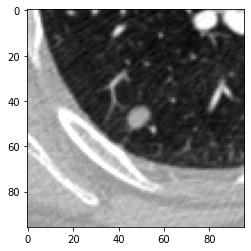

count: 9
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872
[30]
low: 30
high: 30
count: 10
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375
[31]
low: 31
high: 31
count: 11
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943
[32, 33, 34, 35]
low: 32
high: 35
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-102.5', '-74', '-220', '1']
[-220.   -74.  -102.5]
[ 62.         154.96530811 116.05331444]
[[0.06285714 0.05285714 0.01       ... 0.70071429 0.55571429 0.69142857]
 [0.         0.09785714 0.03785714 ... 0.61428571 0.82428571 0.72357143]
 [0.085      0.         0.         ... 0.83071429 0.77071429 0.69357143]
 ...
 [1.         0.81571429 0.86571429 ... 0.05928571 0.00857143 0.08      ]
 [0.895      0.89857143 0.91071429 ... 0.12357143 0.16714286 0.09285714]
 [0.97928571 0.90642857 0.97       ... 0.13785714 0.08357143 0.09142857]]


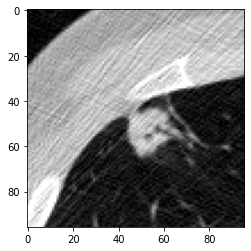

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-97.54122491', '-73.36723259', '-222.9974028', '1']
[-222.9974028   -73.36723259  -97.54122491]
[ 59.60207776 155.82924641 122.82369427]
[[0.015      0.07428571 0.02785714 ... 0.80714286 0.80785714 0.72071429]
 [0.125      0.00428571 0.05142857 ... 0.77714286 0.69428571 0.77571429]
 [0.05071429 0.02642857 0.02571429 ... 0.78928571 0.80857143 0.79357143]
 ...
 [0.62071429 0.17928571 0.04142857 ... 0.16714286 0.22071429 0.37357143]
 [0.455      0.12928571 0.10857143 ... 0.32857143 0.36571429 0.43357143]
 [0.225      0.15428571 0.08785714 ... 0.28142857 0.26785714 0.43071429]]


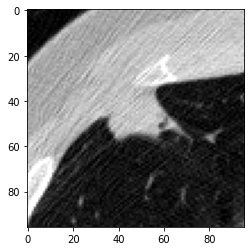

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-100.9691565', '-66.4213815', '-217.94', '1']
[-217.94       -66.4213815 -100.9691565]
[ 63.648      165.31264689 118.14342576]
[[0.         0.06785714 0.05285714 ... 0.57571429 0.58571429 0.71071429]
 [0.         0.         0.         ... 0.62       0.79214286 0.72285714]
 [0.04857143 0.03285714 0.         ... 0.79785714 0.72714286 0.76714286]
 ...
 [1.         0.72571429 0.50714286 ... 0.02071429 0.04785714 0.09928571]
 [0.835      0.60571429 0.43642857 ... 0.10428571 0.05285714 0.01      ]
 [0.66642857 0.56857143 0.17285714 ... 0.04928571 0.00857143 0.12428571]]


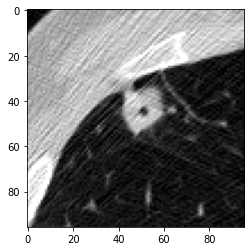

count: 12
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
[36, 37, 38, 39, 40, 41]
low: 36
high: 41
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-68.88594854', '-80.49293991', '-190.126323', '1']
[-190.126323    -80.49293991  -68.88594854]
[113.373677   427.27940247 133.46901402]
[[0.08642857 0.20357143 0.26357143 ... 0.21785714 0.28214286 0.52142857]
 [0.145      0.29428571 0.27428571 ... 0.13285714 0.14285714 0.41285714]
 [0.15571429 0.20214286 0.16928571 ... 0.06928571 0.07642857 0.30142857]
 ...
 [0.59285714 0.61714286 0.61785714 ... 1.         1.         1.        ]
 [0.61714286 0.61642857 0.60071429 ... 1.         0.96       0.85071429]
 [0.65785714 0.66428571 0.64       ... 0.77428571 0.74357143 0.68357143]]


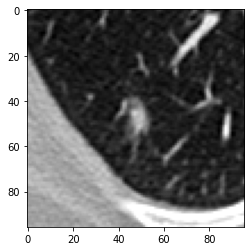

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '101.25', '-180.465', '-224.345', '1']
[-224.345 -180.465  101.25 ]
[ 79.155      262.16425806 414.46774194]
[[0.93071429 0.90571429 0.93857143 ... 0.86571429 0.72357143 0.69357143]
 [0.855      0.86       0.90071429 ... 0.83357143 0.715      0.69928571]
 [0.855      0.89071429 0.92142857 ... 0.84785714 0.73928571 0.74071429]
 ...
 [0.65571429 0.62214286 0.60357143 ... 0.33928571 0.55642857 0.64928571]
 [0.695      0.67785714 0.62642857 ... 0.39428571 0.59       0.65      ]
 [0.66428571 0.67428571 0.61928571 ... 0.41714286 0.61571429 0.65857143]]


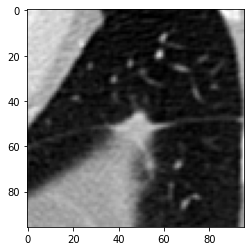

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-46.54104772', '-66.80022363', '-207.6218183', '1']
[-207.6218183   -66.80022363  -46.54104772]
[ 95.8781817  449.89446936 170.37414054]
[[0.13       0.11       0.07571429 ... 0.34928571 0.67       1.        ]
 [0.10714286 0.11357143 0.10714286 ... 0.36714286 0.67785714 1.        ]
 [0.07571429 0.09928571 0.10714286 ... 0.36142857 0.69285714 0.95      ]
 ...
 [0.66       0.64571429 0.63357143 ... 0.63142857 0.61071429 0.66285714]
 [0.66714286 0.675      0.65714286 ... 0.59785714 0.59357143 0.62642857]
 [0.65142857 0.66714286 0.665      ... 0.61357143 0.63071429 0.63357143]]


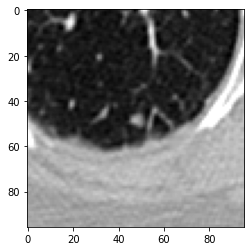

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-107.1644726', '-146.6638704', '-186.3209291', '1']
[-186.3209291 -146.6638704 -107.1644726]
[117.1790709  317.99063986  70.24770977]
[[0.64       0.61857143 0.64357143 ... 0.07071429 0.06642857 0.08357143]
 [0.63428571 0.59857143 0.62428571 ... 0.06071429 0.02714286 0.01714286]
 [0.61928571 0.605      0.62571429 ... 0.17       0.09214286 0.025     ]
 ...
 [0.73642857 0.77357143 0.75928571 ... 0.10285714 0.08785714 0.02214286]
 [0.69142857 0.685      0.74785714 ... 0.06642857 0.06357143 0.04214286]
 [0.68214286 0.7        0.73285714 ... 0.05285714 0.04928571 0.05928571]]


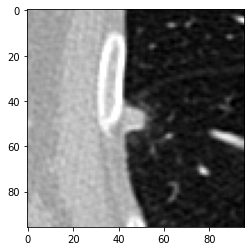

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '122.3370789', '-175.9876589', '-194.1075', '1']
[-194.1075    -175.9876589  122.3370789]
[109.3925     269.5590924  449.29543354]
[[0.01357143 0.03428571 0.09285714 ... 0.64714286 0.66714286 0.67428571]
 [0.06928571 0.09285714 0.09285714 ... 0.61785714 0.63214286 0.645     ]
 [0.07571429 0.08       0.04571429 ... 0.64071429 0.63214286 0.62857143]
 ...
 [0.08785714 0.07071429 0.05785714 ... 0.60857143 0.61       0.59285714]
 [0.08142857 0.07928571 0.07428571 ... 0.645      0.65285714 0.63      ]
 [0.085      0.10357143 0.08214286 ... 0.67071429 0.66642857 0.64785714]]


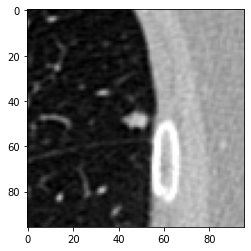

count: 13
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[42]
low: 42
high: 42
count: 14


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2


IndexError: ignored

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


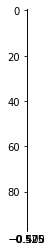

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


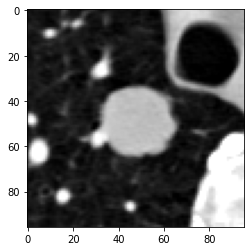

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


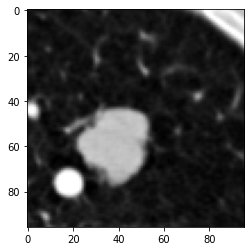

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


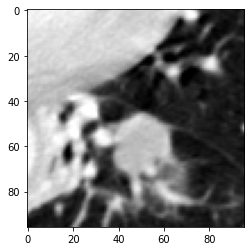

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


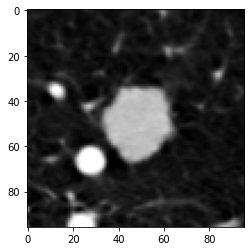

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


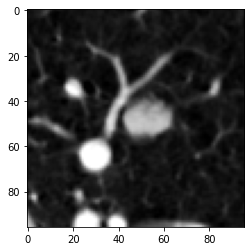

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


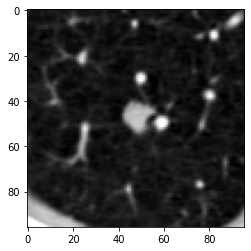

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


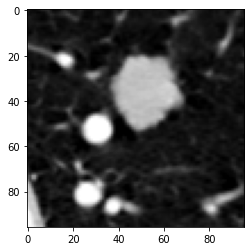

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


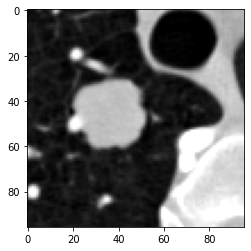

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


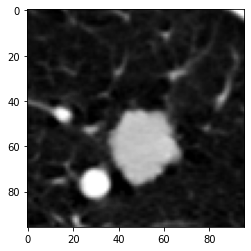

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


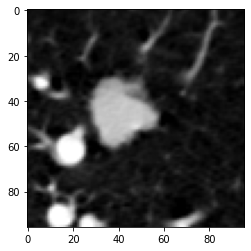

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


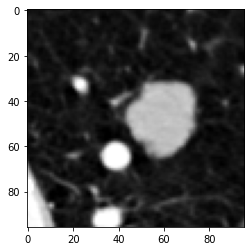

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


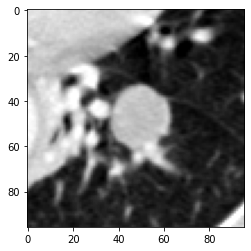

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


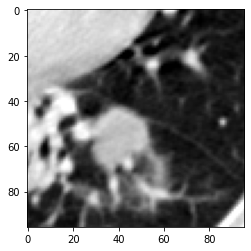

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


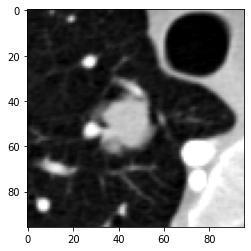

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


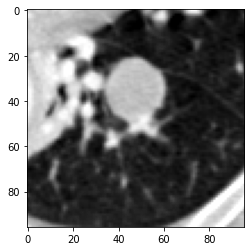

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


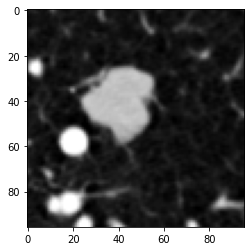

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    # print(rows)
    # print("low:",rows[0])
    # print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860


IndexError: ignored

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]
    candidate_path = '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv'  
    cands = readcsv(candidate_path)
    
    for cand in cands[low:high]:
        print(cand)
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 96
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


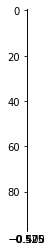

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


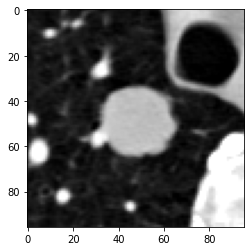

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


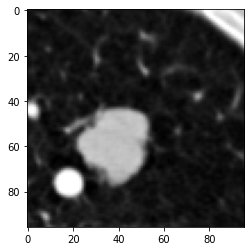

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


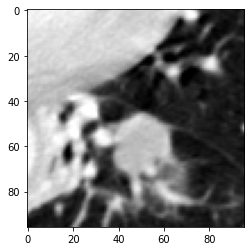

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


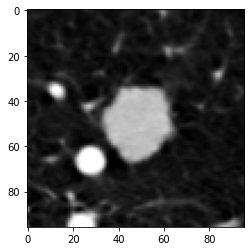

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


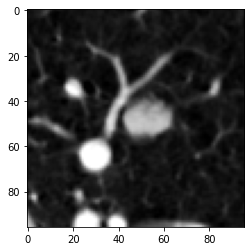

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


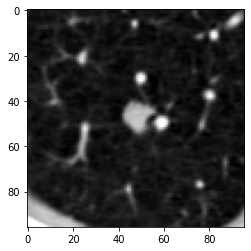

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


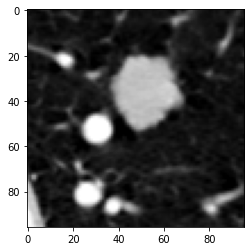

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


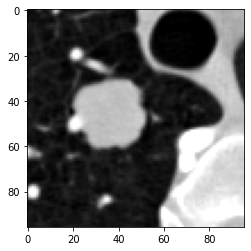

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


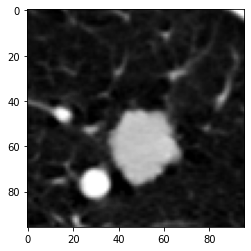

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


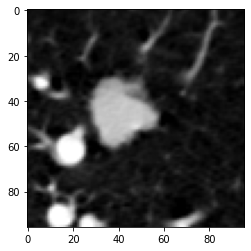

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


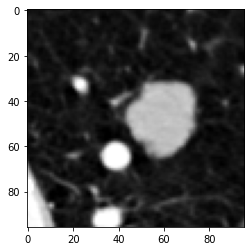

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


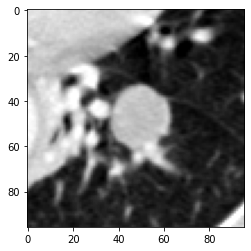

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


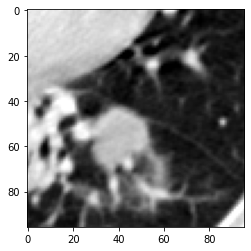

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


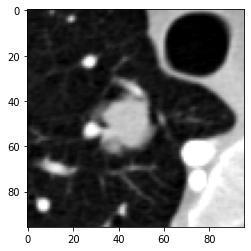

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


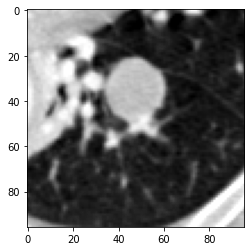

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


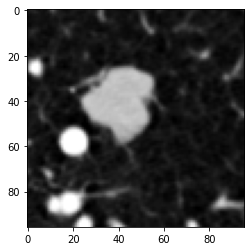

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
[22, 23, 24]
low: 22
high: 24
['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '96.28467267', '19.03486907', '-88.47844082', '1']
[-88.47844082  19.03486907  96.28467267]
[122.40862367 278.14966583 343.95307365]
[[0.80642857 0.78571429 0.77785714 ... 0.63142857 0.62285714 0.63714286]
 [0.82071429 0.805      0.78571429 ... 0.62285714 0.61857143 0.62      ]
 [0.80071429 0.81142857 0.81357143 ... 0.63714286 0.63285714 0.61714286]
 ...
 [0.13142857 0.11285714 0.10642857 ... 0.74357143 0.725      0.73357143]
 [0.08857143 0.06428571 0.06428571 ... 0.71714286 0.72857143 0.74285714]
 [0.07857143 0.08214286 0.08571429 ... 0.74785714 0.73785714 0.74214286]]


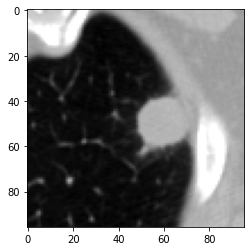

['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '106.18', '12.61', '-96.81', '1']
[-96.81  12.61 106.18]
[119.076      270.67345455 355.46763636]
[[1.         0.83714286 0.65357143 ... 0.62785714 0.635      0.625     ]
 [1.         0.98928571 0.76       ... 0.62571429 0.635      0.62428571]
 [1.         1.         0.86714286 ... 0.63642857 0.63642857 0.62285714]
 ...
 [0.05142857 0.05214286 0.07       ... 0.71285714 0.72071429 0.73214286]
 [0.06071429 0.06285714 0.06928571 ... 0.73571429 0.73857143 0.74714286]
 [0.06785714 0.06285714 0.06785714 ... 0.71142857 0.71071429 0.72642857]]


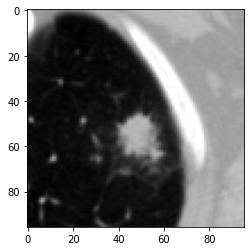

count: 5
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
[25]
low: 25
high: 25
count: 6
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
[26]
low: 26
high: 26
count: 7
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774
[27]
low: 27
high: 27
count: 8
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
[28, 29]
low: 28
high: 29
['1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949', '-70.748125', '67.2790625', '-160.9525', '1']
[-160.9525      67.2790625  -70.748125 ]
[ 89.438  342.1172 165.4424]
[[0.81285714 0.76       0.86714286 ... 0.70357143 0.72928571 0.78928571]
 [0.82714286 0.78071429 0.83642857 ... 0.86928571 0.925      0.84857143]
 [0.81571429 0.80928571 0.76571429 ... 0.99857143 0.99571429 0.94071429]
 ...
 [0.66928571 0.645      0.65642857 ... 0.63071429 0.65071429 0.69214286]
 [0.65428571 0.61285714 0.62285714 ... 0.63428571 0.65357143 0.66071429]
 [0.68714286 0.63642857 0.64357143 ... 0.635      0.67928

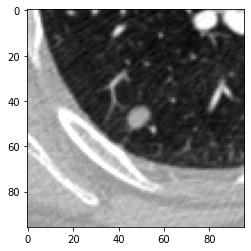

count: 9
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872
[30]
low: 30
high: 30
count: 10
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375
[31]
low: 31
high: 31
count: 11
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943
[32, 33, 34, 35]
low: 32
high: 35
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-102.5', '-74', '-220', '1']
[-220.   -74.  -102.5]
[ 62.         154.96530811 116.05331444]
[[0.06285714 0.05285714 0.01       ... 0.70071429 0.55571429 0.69142857]
 [0.         0.09785714 0.03785714 ... 0.61428571 0.82428571 0.72357143]
 [0.085      0.         0.         ... 0.83071429 0.77071429 0.69357143]
 ...
 [1.         0.81571429 0.86571429 ... 0.05928571 0.00857143 0.08      ]
 [0.895      0.89857143 0.91071429 ... 0.12357143 0.16714286 0.09285714]
 [0.97928571 0.90642857 0.97       ... 0.13785714 0.08357143 0.09142857]]


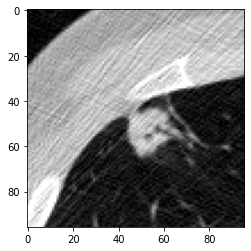

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-97.54122491', '-73.36723259', '-222.9974028', '1']
[-222.9974028   -73.36723259  -97.54122491]
[ 59.60207776 155.82924641 122.82369427]
[[0.015      0.07428571 0.02785714 ... 0.80714286 0.80785714 0.72071429]
 [0.125      0.00428571 0.05142857 ... 0.77714286 0.69428571 0.77571429]
 [0.05071429 0.02642857 0.02571429 ... 0.78928571 0.80857143 0.79357143]
 ...
 [0.62071429 0.17928571 0.04142857 ... 0.16714286 0.22071429 0.37357143]
 [0.455      0.12928571 0.10857143 ... 0.32857143 0.36571429 0.43357143]
 [0.225      0.15428571 0.08785714 ... 0.28142857 0.26785714 0.43071429]]


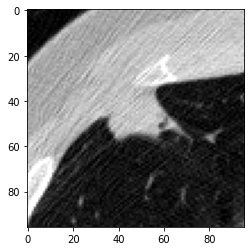

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-100.9691565', '-66.4213815', '-217.94', '1']
[-217.94       -66.4213815 -100.9691565]
[ 63.648      165.31264689 118.14342576]
[[0.         0.06785714 0.05285714 ... 0.57571429 0.58571429 0.71071429]
 [0.         0.         0.         ... 0.62       0.79214286 0.72285714]
 [0.04857143 0.03285714 0.         ... 0.79785714 0.72714286 0.76714286]
 ...
 [1.         0.72571429 0.50714286 ... 0.02071429 0.04785714 0.09928571]
 [0.835      0.60571429 0.43642857 ... 0.10428571 0.05285714 0.01      ]
 [0.66642857 0.56857143 0.17285714 ... 0.04928571 0.00857143 0.12428571]]


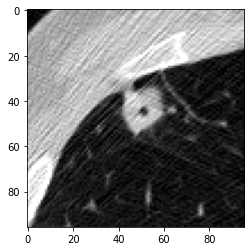

count: 12
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
[36, 37, 38, 39, 40, 41]
low: 36
high: 41
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-68.88594854', '-80.49293991', '-190.126323', '1']
[-190.126323    -80.49293991  -68.88594854]
[113.373677   427.27940247 133.46901402]
[[0.08642857 0.20357143 0.26357143 ... 0.21785714 0.28214286 0.52142857]
 [0.145      0.29428571 0.27428571 ... 0.13285714 0.14285714 0.41285714]
 [0.15571429 0.20214286 0.16928571 ... 0.06928571 0.07642857 0.30142857]
 ...
 [0.59285714 0.61714286 0.61785714 ... 1.         1.         1.        ]
 [0.61714286 0.61642857 0.60071429 ... 1.         0.96       0.85071429]
 [0.65785714 0.66428571 0.64       ... 0.77428571 0.74357143 0.68357143]]


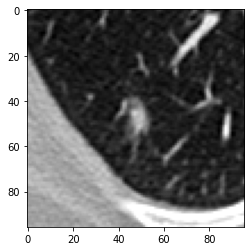

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '101.25', '-180.465', '-224.345', '1']
[-224.345 -180.465  101.25 ]
[ 79.155      262.16425806 414.46774194]
[[0.93071429 0.90571429 0.93857143 ... 0.86571429 0.72357143 0.69357143]
 [0.855      0.86       0.90071429 ... 0.83357143 0.715      0.69928571]
 [0.855      0.89071429 0.92142857 ... 0.84785714 0.73928571 0.74071429]
 ...
 [0.65571429 0.62214286 0.60357143 ... 0.33928571 0.55642857 0.64928571]
 [0.695      0.67785714 0.62642857 ... 0.39428571 0.59       0.65      ]
 [0.66428571 0.67428571 0.61928571 ... 0.41714286 0.61571429 0.65857143]]


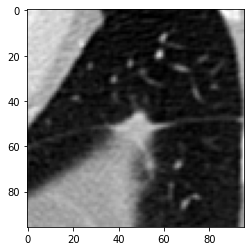

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-46.54104772', '-66.80022363', '-207.6218183', '1']
[-207.6218183   -66.80022363  -46.54104772]
[ 95.8781817  449.89446936 170.37414054]
[[0.13       0.11       0.07571429 ... 0.34928571 0.67       1.        ]
 [0.10714286 0.11357143 0.10714286 ... 0.36714286 0.67785714 1.        ]
 [0.07571429 0.09928571 0.10714286 ... 0.36142857 0.69285714 0.95      ]
 ...
 [0.66       0.64571429 0.63357143 ... 0.63142857 0.61071429 0.66285714]
 [0.66714286 0.675      0.65714286 ... 0.59785714 0.59357143 0.62642857]
 [0.65142857 0.66714286 0.665      ... 0.61357143 0.63071429 0.63357143]]


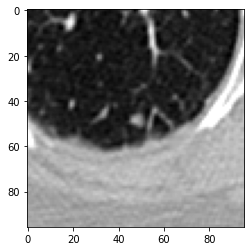

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-107.1644726', '-146.6638704', '-186.3209291', '1']
[-186.3209291 -146.6638704 -107.1644726]
[117.1790709  317.99063986  70.24770977]
[[0.64       0.61857143 0.64357143 ... 0.07071429 0.06642857 0.08357143]
 [0.63428571 0.59857143 0.62428571 ... 0.06071429 0.02714286 0.01714286]
 [0.61928571 0.605      0.62571429 ... 0.17       0.09214286 0.025     ]
 ...
 [0.73642857 0.77357143 0.75928571 ... 0.10285714 0.08785714 0.02214286]
 [0.69142857 0.685      0.74785714 ... 0.06642857 0.06357143 0.04214286]
 [0.68214286 0.7        0.73285714 ... 0.05285714 0.04928571 0.05928571]]


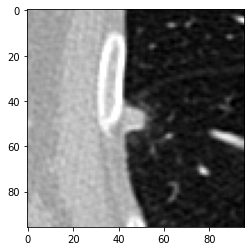

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '122.3370789', '-175.9876589', '-194.1075', '1']
[-194.1075    -175.9876589  122.3370789]
[109.3925     269.5590924  449.29543354]
[[0.01357143 0.03428571 0.09285714 ... 0.64714286 0.66714286 0.67428571]
 [0.06928571 0.09285714 0.09285714 ... 0.61785714 0.63214286 0.645     ]
 [0.07571429 0.08       0.04571429 ... 0.64071429 0.63214286 0.62857143]
 ...
 [0.08785714 0.07071429 0.05785714 ... 0.60857143 0.61       0.59285714]
 [0.08142857 0.07928571 0.07428571 ... 0.645      0.65285714 0.63      ]
 [0.085      0.10357143 0.08214286 ... 0.67071429 0.66642857 0.64785714]]


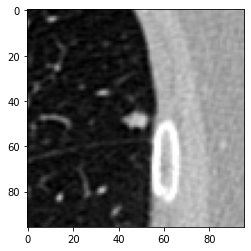

count: 13
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[42]
low: 42
high: 42
count: 14
1.3.6.1.4.1.14519.5.2.1.6279.6001.108231420525711026834210228428
[43]
low: 43
high: 43
count: 15
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[44, 45]
low: 44
high: 45
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059', '45.51700818', '48.78923112', '-109.2052766', '1']
[-109.2052766    48.78923112   45.51700818]
[ 67.83577872 286.22670939 424.9364149 ]
[[0.78642857 0.81       0.93071429 ... 0.56571429 0.54571429 0.485     ]
 [0.71928571 0.63714286 0.715      ... 0.79285714 0.89       0.74785714]
 [0.90571429 0.63928571 0.91428571 ... 0.51428571 0.49428571 0.65571429]
 ...
 [0.13642857 0.04571429 0.05357143 ... 0.60428571 0.73642857 0.68428571]
 [0.21       0.21857143 0.11714286 ... 0.68       0.56357143 0.64214286]
 [0.30285714 0.40285714 0.22928571 ... 0.55357143 0.55785714 0.51642857]]


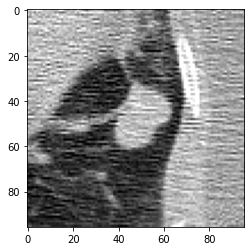

count: 16
1.3.6.1.4.1.14519.5.2.1.6279.6001.110678335949765929063942738609
[46, 47]
low: 46
high: 47
['1.3.6.1.4.1.14519.5.2.1.6279.6001.110678335949765929063942738609', '-39.845', '-101.77', '-135.615', '1']
[-135.615 -101.77   -39.845]
[417.77       307.67963899 183.6998556 ]
[[0.04142857 0.05285714 0.05214286 ... 0.         0.         0.        ]
 [0.00285714 0.03285714 0.03785714 ... 0.         0.         0.        ]
 [0.01285714 0.03785714 0.04714286 ... 0.         0.         0.        ]
 ...
 [0.05857143 0.06428571 0.07428571 ... 1.         0.98857143 0.9       ]
 [0.03571429 0.04071429 0.04714286 ... 1.         1.         0.94642857]
 [0.03142857 0.02071429 0.01714286 ... 1.         1.         0.97785714]]


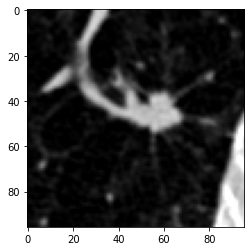

count: 17
1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[48]
low: 48
high: 48
count: 18
1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028
[49, 50]
low: 49
high: 50
['1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028', '-80.6924049', '11.00880374', '-28.8572152', '1']
[-28.8572152   11.00880374 -80.6924049 ]
[228.71422784 311.69409078 167.53214256]
[[0.81071429 0.87714286 0.605      ... 0.02714286 0.09071429 0.02214286]
 [1.         0.94642857 0.98428571 ... 0.02714286 0.05071429 0.12214286]
 [0.68428571 0.77       0.88357143 ... 0.04785714 0.10785714 0.07285714]
 ...
 [0.57142857 0.88571429 0.975      ... 0.82571429 0.58928571 0.45214286]
 [0.69642857 0.49714286 0.59357143 ... 1.         1.         0.92357143]
 [1.         1.         1.         ... 0.23857143 0.46857143 0.69785714]]


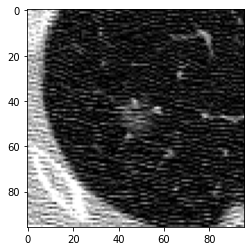

count: 19
1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962
[51, 52, 53]
low: 51
high: 53
['1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962', '15.772263', '83.688848', '-146.0625', '1']
[-146.0625     83.688848   15.772263]
[133.15       391.59681826 290.30419212]
[[0.87642857 0.755      0.93571429 ... 0.07285714 0.14571429 0.        ]
 [0.73428571 0.93285714 0.93214286 ... 0.         0.         0.05285714]
 [0.67285714 0.86714286 0.73928571 ... 0.15071429 0.05642857 0.12857143]
 ...
 [0.70571429 0.62857143 0.62142857 ... 0.57928571 0.52285714 0.53785714]
 [0.72857143 0.56285714 0.62285714 ... 0.61785714 0.55785714 0.74785714]
 [0.75642857 0.59571429 0.775      ... 0.77571429 0.81142857 0.68857143]]


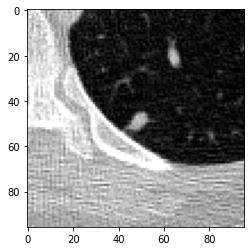

['1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962', '99.264953', '9.316474', '-182.9', '1']
[-182.9         9.316474   99.264953]
[103.68       271.09483703 425.58338279]
[[0.02357143 0.         0.         ... 0.58857143 0.70571429 0.51142857]
 [0.         0.01428571 0.12642857 ... 0.615      0.63214286 0.61071429]
 [0.06214286 0.165      0.02       ... 0.60785714 0.67357143 0.54642857]
 ...
 [0.         0.04285714 0.         ... 0.60785714 0.67857143 0.66714286]
 [0.         0.         0.07142857 ... 0.49       0.62142857 0.61642857]
 [0.05785714 0.         0.         ... 0.61142857 0.66857143 0.61      ]]


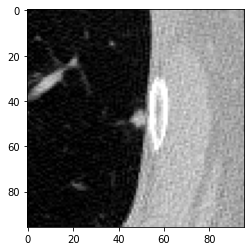

count: 20


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
print(len(cancer_image_data), len(cancer_image_labels))

946 957


In [ ]:
cancernodule_image_900_96_96 = np.asarray(cancer_image_data[:900])

In [ ]:
plt.imshow(cancernodule_image.reshape(96,96))

ValueError: ignored

In [ ]:
cancer_image_data.pop(671)

array([], shape=(96, 0, 1), dtype=float64)

In [ ]:
cancernodule_image_900_96_96.shape

(900, 96, 96, 1)

In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_96_96_patches.npy",cancernodule_image_900_96_96)

saving data


In [ ]:
cancernodule_image_900 = np.asarray(cancer_image_data[0:900])
print(cancernodule_image_900.shape)

(900, 65, 65, 1)


In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_slices.npy",cancernodule_image_900)

saving data


In [ ]:
print(np.load('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_slices.npy').shape)

(900, 65, 65, 1)


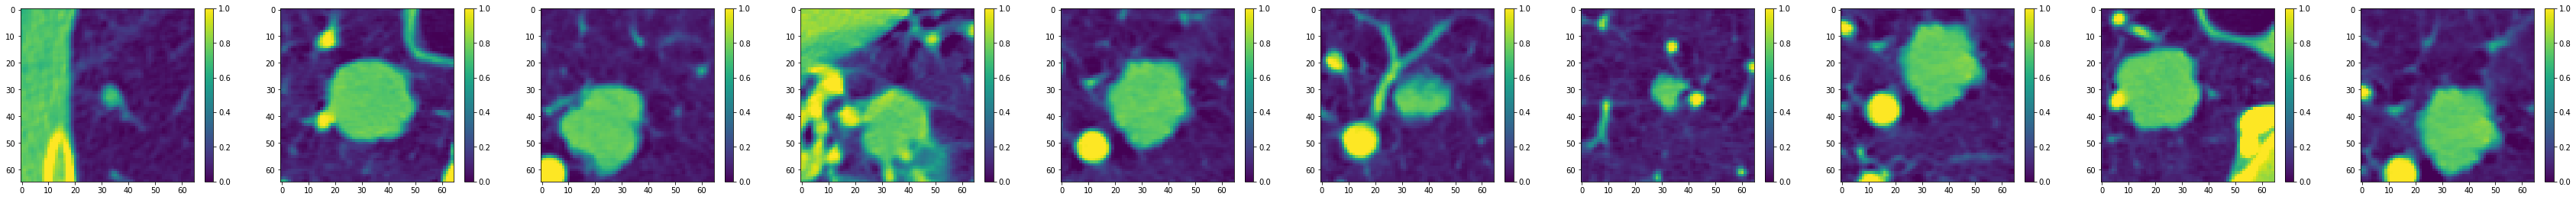

In [ ]:
fig = plt.figure(figsize=(60,300))

for i in range(0,10):
  y = fig.add_subplot(60,10,i+1)
  try:
    plt.imshow(cancernodule_image[i].reshape(65,65))
    plt.colorbar()
  except:
    continue

In [ ]:
plt.imshow(cancernodule_image.reshape(65,65))

ValueError: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
print(count)

RuntimeError: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
print(count)

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

In [ ]:
print(len(cancer_image_data), len(cancer_image_labels))

556 556


In [ ]:
type(cancer_image_data)

list

In [ ]:
cancer_image_data.pop(63)

array([], shape=(65, 0, 1), dtype=float64)

In [ ]:
cancernodule_image = np.asarray(cancer_image_data[0:500])

In [ ]:
cancernodule_image.shape

(500, 65, 65, 1)

In [ ]:
fig = plt.figure(figsize=(20,200))

for i in range(0,556):
  y = fig.add_subplot(60,10,i+1)
  try:
    plt.imshow(cancernodule_image[i].reshape(65,65))
  except:
    continue

In [ ]:
cancernodule_image = np.array(cancer_image_data)
cancernodule_labels = np.array(cancer_image_labels)
print(cancernodule_image.shape, cancernodule_labels.shape, cancernodule_labels[0].shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: ignored

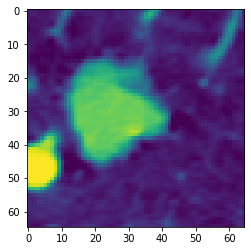

In [ ]:
plt.imshow(cancernodule_image.reshape(65,65))

In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_new_500.npy",cancernodule_image)

saving data


In [ ]:
print(np.load('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_new_500.npy').shape)

(500, 65, 65, 1)


In [ ]:
test_cancernodule_image = np.array(cancer_image_data[500:550])
print(test_cancernodule_image.shape)

(50, 65, 65, 1)


In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/test_cancernodule_image_new_500.npy",test_cancernodule_image)

saving data


In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)
    
    if 
    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

#     cands = readcsv(cand_path)
    
#     for cand in cands[low:high]:
#         world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
#         voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
#         voxel_width = 65
#         #a rectangle slice of height x width at depth
#         patch = numpy_image[int(voxel_coord[0]),
#                             int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
#                             int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
#         patch = normalize_planes(patch)
        
#         print(world_coord)
#         print(voxel_coord)
#         print(patch)
        
#         new_img = np.expand_dims(patch,axis = -1)
#         cancer_image_data.append(new_img)
#         cancer_image_labels.append(1)

# #         output_dir = 'patches/'
#         plt.imshow(patch, cmap = 'gray')
#         plt.show()
# #         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
# #                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.

KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5

KeyboardInterrupt: ignored

In [ ]:
rows=[]
p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
      myData = csv.reader(o)
      for row in myData:
        if row[0] == p:
          rows.append(myData.line_num)

print(rows)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6

KeyboardInterrupt: ignored

In [ ]:
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    # print(rows)
    # print("low:",rows[0])
    # print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[-377.4263503   -91.80940617  -95.20936148]
[ 33.87425073 341.12903576  96.92062025]
[[0.77428571 0.79428571 0.76857143 ... 0.79571429 0.78285714 0.75571429]
 [0.80285714 0.79642857 0.75357143 ... 0.755      0.775      0.78928571]
 [0.80285714 0.78571429 0.76214286 ... 0.75357143 0.775      0.79714286]
 ...
 [0.70928571 0.72714286 0.73571429 ... 0.13428571 0.19785714 0.25857143]
 [0.76642857 0.79571429 0.76       ... 0.11785714 0.205      0.22714286]
 [0.77142857 0.80785714 0.76071429 ... 0.07785714 0.17785714 0.19142857]]


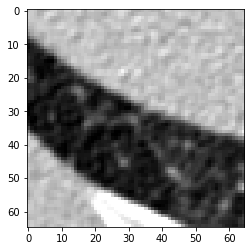

[-273.3615387  -120.3792939   -24.76675476]
[ 91.68803648 296.80242207 206.21339189]
[[0.12571429 0.09285714 0.05857143 ... 0.74857143 0.76142857 0.76428571]
 [0.07571429 0.07357143 0.07785714 ... 0.78428571 0.76428571 0.725     ]
 [0.07857143 0.05714286 0.07285714 ... 0.76285714 0.73714286 0.72785714]
 ...
 [0.01       0.03       0.065      ... 0.675      0.7        0.72285714]
 [0.02428571 0.05142857 0.08428571 ... 0.68785714 0.71428571 0.73214286]
 [0.05071429 0.085      0.15       ... 0.69285714 0.72571429 0.74214286]]


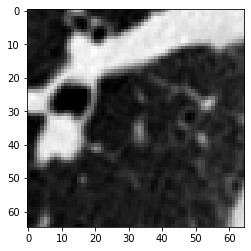

[-344.24  -65.74  -63.08]
[ 52.3111125  381.57611442 146.76981139]
[[0.05       0.06285714 0.10785714 ... 0.07928571 0.16357143 0.15357143]
 [0.08857143 0.10857143 0.12214286 ... 0.07928571 0.125      0.11928571]
 [0.14714286 0.14928571 0.10714286 ... 0.10785714 0.07714286 0.05857143]
 ...
 [0.775      0.73357143 0.74928571 ... 0.72785714 0.72357143 0.73571429]
 [0.75714286 0.72857143 0.77928571 ... 0.72642857 0.74       0.73357143]
 [0.72857143 0.75071429 0.80142857 ... 0.74214286 0.75714286 0.75428571]]


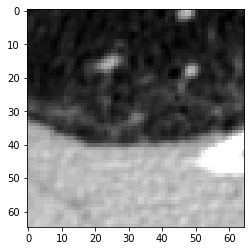

[-241.067872    -92.68887262   52.94668794]
[109.6289629  339.76453024 326.78697571]
[[0.65142857 0.65214286 0.70214286 ... 0.71071429 0.70357143 0.66785714]
 [0.6        0.62857143 0.70714286 ... 0.695      0.71642857 0.69928571]
 [0.58142857 0.63214286 0.71428571 ... 0.55142857 0.63714286 0.67642857]
 ...
 [0.88214286 0.88571429 0.93285714 ... 0.12071429 0.13       0.13785714]
 [0.82642857 0.845      0.90428571 ... 0.11857143 0.10285714 0.11142857]
 [0.83357143 0.85285714 0.89571429 ... 0.09571429 0.06214286 0.08714286]]


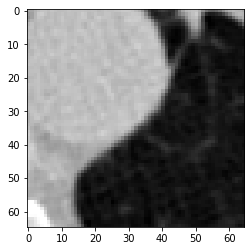

[-249.5945431  -104.8118604    54.65773103]
[104.89192328 320.95553102 329.44168499]
[[0.64214286 0.57857143 0.45571429 ... 0.07142857 0.05142857 0.04928571]
 [0.63071429 0.59214286 0.49642857 ... 0.07571429 0.065      0.06142857]
 [0.66071429 0.615      0.53071429 ... 0.07571429 0.07857143 0.08357143]
 ...
 [0.62357143 0.64285714 0.69928571 ... 0.07428571 0.06857143 0.07428571]
 [0.66642857 0.675      0.71857143 ... 0.05285714 0.045      0.05428571]
 [0.67285714 0.67714286 0.72571429 ... 0.04285714 0.03714286 0.065     ]]


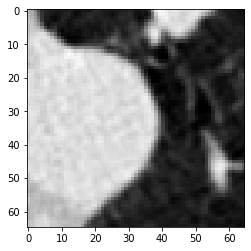

[-333.76 -138.79  134.73]
[ 58.13333487 268.23793261 453.67502352]
[[0.50785714 0.50142857 0.48142857 ... 0.01       0.02214286 0.04928571]
 [0.41214286 0.39857143 0.37714286 ... 0.04142857 0.02928571 0.05642857]
 [0.28214286 0.25428571 0.27071429 ... 0.08357143 0.06785714 0.08285714]
 ...
 [0.08214286 0.10142857 0.10071429 ... 0.72714286 0.72071429 0.73714286]
 [0.09714286 0.15357143 0.18       ... 0.735      0.74357143 0.77428571]
 [0.09928571 0.205      0.31285714 ... 0.75571429 0.76357143 0.78357143]]


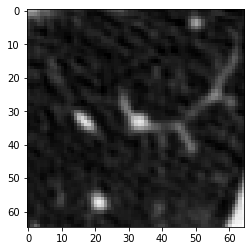

[-379.787441    -84.7526841    84.80405524]
[ 32.56253364 352.07764697 376.21416377]
[[0.72214286 0.70714286 0.65       ... 0.79071429 0.84357143 0.795     ]
 [0.73       0.72785714 0.65       ... 0.78214286 0.78928571 0.76571429]
 [0.73357143 0.775      0.78142857 ... 0.795      0.77214286 0.76357143]
 ...
 [0.74928571 0.76142857 0.765      ... 0.67285714 0.67571429 0.65357143]
 [0.70357143 0.72714286 0.73       ... 0.70214286 0.71642857 0.69714286]
 [0.725      0.75357143 0.77571429 ... 0.70642857 0.76       0.76571429]]


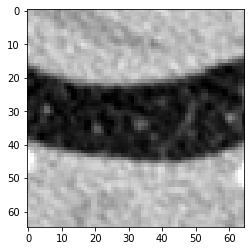

[-258.23 -171.11  -76.47]
[100.0944471  218.09296291 125.99502352]
[[0.02785714 0.05142857 0.06714286 ... 0.07428571 0.07857143 0.09642857]
 [0.04642857 0.06428571 0.075      ... 0.05928571 0.06428571 0.07928571]
 [0.03642857 0.05357143 0.05285714 ... 0.05214286 0.03785714 0.05071429]
 ...
 [0.09428571 0.025      0.00714286 ... 0.04357143 0.07142857 0.05428571]
 [0.06714286 0.01642857 0.01642857 ... 0.08571429 0.09928571 0.07714286]
 [0.08357143 0.05071429 0.04571429 ... 0.105      0.10285714 0.07785714]]


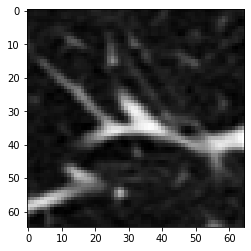

[-257.82 -218.48  -38.56]
[100.32222488 144.59769018 184.81296291]
[[0.015      0.01       0.03214286 ... 0.46857143 0.56571429 0.61785714]
 [0.02928571 0.03142857 0.035      ... 0.59214286 0.65428571 0.67714286]
 [0.06071429 0.04714286 0.03357143 ... 0.625      0.66714286 0.69285714]
 ...
 [0.12785714 0.03714286 0.         ... 0.765      0.78285714 0.76928571]
 [0.13714286 0.07071429 0.         ... 0.75428571 0.80785714 0.82142857]
 [0.14214286 0.11071429 0.03       ... 0.74214286 0.78785714 0.80142857]]


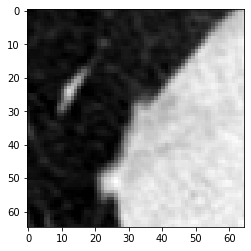

[-218.2433964   -68.43084739   90.10228469]
[122.30922746 377.40122393 384.43444703]
[[0.11714286 0.09       0.1        ... 0.04642857 0.06928571 0.07428571]
 [0.11214286 0.12       0.13071429 ... 0.08214286 0.08142857 0.08857143]
 [0.05357143 0.08357143 0.07857143 ... 0.085      0.07928571 0.065     ]
 ...
 [1.         1.         1.         ... 0.60285714 0.62785714 0.63      ]
 [1.         1.         1.         ... 0.61928571 0.62714286 0.62      ]
 [1.         1.         1.         ... 0.63285714 0.62714286 0.63428571]]


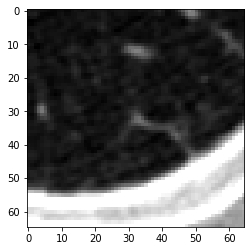

[-132.4212375 -130.4369022  -20.1010061]
[169.98820589 281.1978904  213.45237163]
[[0.04571429 0.07285714 0.09357143 ... 0.81071429 0.82571429 0.82571429]
 [0.05571429 0.05714286 0.12928571 ... 0.80571429 0.78285714 0.76714286]
 [0.085      0.06357143 0.08785714 ... 0.83142857 0.79285714 0.76857143]
 ...
 [0.08714286 0.09642857 0.10214286 ... 0.03928571 0.05714286 0.05      ]
 [0.10428571 0.08785714 0.06857143 ... 0.04571429 0.05       0.04214286]
 [0.115      0.08       0.07       ... 0.08       0.06071429 0.05642857]]


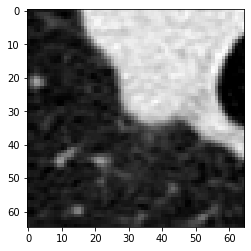

[-367.775  -77.5    -80.93 ]
[ 39.23611215 363.33029624 119.07526594]
[[0.06571429 0.06214286 0.05928571 ... 0.69142857 0.65642857 0.755     ]
 [0.06571429 0.05071429 0.05857143 ... 0.69357143 0.72       0.805     ]
 [0.05071429 0.05214286 0.07071429 ... 0.74142857 0.77857143 0.82571429]
 ...
 [0.70714286 0.79071429 0.81428571 ... 0.83071429 0.80857143 0.78928571]
 [0.68214286 0.73       0.745      ... 0.79428571 0.74785714 0.70142857]
 [0.63928571 0.64714286 0.665      ... 0.80142857 0.76428571 0.70785714]]


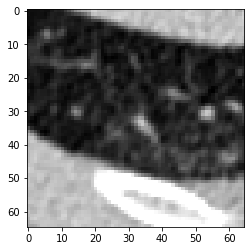

[-327.54 -116.75   60.83]
[ 61.58889052 302.43332655 339.01805382]
[[0.11857143 0.05714286 0.04071429 ... 0.23214286 0.24428571 0.29428571]
 [0.1        0.05571429 0.06142857 ... 0.52571429 0.47857143 0.37785714]
 [0.08285714 0.055      0.08357143 ... 0.72428571 0.61214286 0.35357143]
 ...
 [0.665      0.66785714 0.47785714 ... 0.13571429 0.07857143 0.08      ]
 [0.64357143 0.66357143 0.575      ... 0.15071429 0.085      0.03357143]
 [0.61785714 0.62142857 0.62357143 ... 0.12928571 0.08642857 0.02      ]]


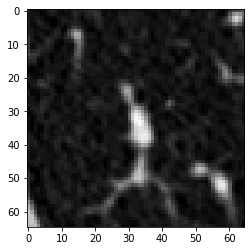

[-187.09 -140.55  -37.58]
[139.61667037 265.50726594 186.33344776]
[[0.05071429 0.04285714 0.03714286 ... 0.76       0.75214286 0.77285714]
 [0.07357143 0.09142857 0.08714286 ... 0.77285714 0.75214286 0.75642857]
 [0.08785714 0.09857143 0.10071429 ... 0.75785714 0.73642857 0.715     ]
 ...
 [0.06642857 0.05071429 0.04285714 ... 0.11285714 0.05571429 0.03785714]
 [0.05       0.055      0.06285714 ... 0.10642857 0.08428571 0.09214286]
 [0.06571429 0.09071429 0.09642857 ... 0.05857143 0.06714286 0.11      ]]


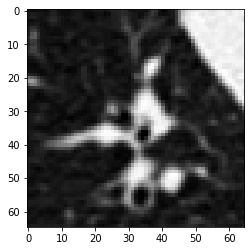

[-219.88 -140.71  -56.08]
[121.40000322 265.25902352 157.63041745]
[[0.06285714 0.05928571 0.05428571 ... 0.05       0.09357143 0.10714286]
 [0.06714286 0.04857143 0.03785714 ... 0.05642857 0.10357143 0.10071429]
 [0.07142857 0.06642857 0.07357143 ... 0.04785714 0.07357143 0.07357143]
 ...
 [0.00142857 0.02571429 0.14571429 ... 0.02357143 0.04071429 0.05285714]
 [0.02857143 0.05714286 0.14428571 ... 0.03857143 0.05       0.04785714]
 [0.05       0.05928571 0.11142857 ... 0.095      0.06642857 0.04642857]]


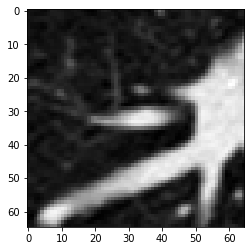

[-311.514231    -85.8456079   -34.16706944]
[ 70.49209576 350.38195914 191.62866123]
[[0.79785714 0.805      0.75285714 ... 0.17714286 0.17357143 0.13642857]
 [0.81071429 0.81642857 0.72       ... 0.16357143 0.18214286 0.16142857]
 [0.78928571 0.77785714 0.62857143 ... 0.17       0.20142857 0.21428571]
 ...
 [0.24071429 0.19142857 0.19214286 ... 1.         0.995      0.83714286]
 [0.15928571 0.16285714 0.21928571 ... 1.         0.91928571 0.8       ]
 [0.13285714 0.15071429 0.21928571 ... 0.85571429 0.79       0.73857143]]


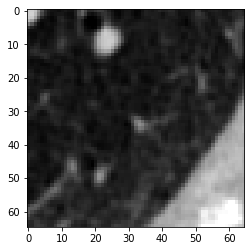

[-257.82  -81.16  -37.16]
[100.32222488 357.65175079 186.98508412]
[[0.05214286 0.05428571 0.06       ... 0.12142857 0.11571429 0.09928571]
 [0.07785714 0.07642857 0.06642857 ... 0.135      0.13142857 0.095     ]
 [0.08714286 0.08428571 0.05571429 ... 0.11428571 0.13071429 0.11071429]
 ...
 [0.255      0.26571429 0.285      ... 0.70428571 0.70714286 0.68285714]
 [0.07928571 0.08571429 0.12357143 ... 0.73714286 0.73714286 0.70928571]
 [0.03071429 0.03785714 0.07785714 ... 0.78428571 0.76357143 0.73785714]]


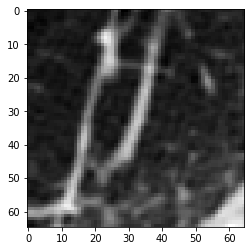

[-250.1317074   -87.11347938 -100.170744  ]
[104.59349866 348.41483733  89.2229601 ]
[[1.         0.91642857 0.58428571 ... 0.07928571 0.06214286 0.04357143]
 [1.         0.94       0.62857143 ... 0.08214286 0.06857143 0.05357143]
 [1.         0.98214286 0.68928571 ... 0.06928571 0.04928571 0.04928571]
 ...
 [0.66428571 0.64571429 0.62357143 ... 0.05285714 0.03571429 0.02714286]
 [0.68642857 0.65571429 0.63142857 ... 0.08714286 0.07214286 0.05857143]
 [0.72142857 0.71857143 0.705      ... 0.10857143 0.08285714 0.05214286]]


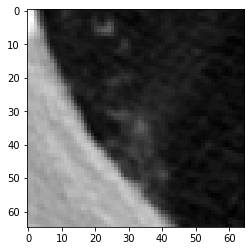

[-315.1088238 -176.8935884 -126.8533532]
[ 68.4950997  209.11963788  47.82448764]
[[0.72928571 0.74214286 0.75928571 ... 0.73571429 0.76       0.78928571]
 [0.75357143 0.75071429 0.74928571 ... 0.73357143 0.75285714 0.76928571]
 [0.76928571 0.74642857 0.73785714 ... 0.75071429 0.75785714 0.76428571]
 ...
 [0.70214286 0.70285714 0.70428571 ... 0.15642857 0.18       0.21571429]
 [0.69071429 0.73785714 0.74285714 ... 0.15214286 0.13071429 0.14928571]
 [0.68214286 0.74428571 0.76       ... 0.14357143 0.10285714 0.12571429]]


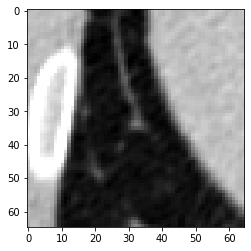

[-262.87 -236.58  -24.08]
[ 97.51666925 116.51526594 207.2789023 ]
[[4.50714286e-01 4.63571429e-01 4.42142857e-01 ... 6.71428571e-02
  7.14285714e-02 3.92857143e-02]
 [1.60000000e-01 1.78571429e-01 1.48571429e-01 ... 7.14285714e-03
  4.07142857e-02 5.07142857e-02]
 [5.42857143e-02 5.35714286e-02 2.35714286e-02 ... 7.14285714e-04
  3.42857143e-02 9.28571429e-02]
 ...
 [8.28571429e-02 1.16428571e-01 6.50000000e-02 ... 7.23571429e-01
  7.26428571e-01 6.94285714e-01]
 [8.50000000e-02 1.35714286e-01 8.71428571e-02 ... 7.22142857e-01
  7.40000000e-01 7.13571429e-01]
 [6.50000000e-02 1.14285714e-01 8.92857143e-02 ... 7.17142857e-01
  7.40000000e-01 7.33571429e-01]]


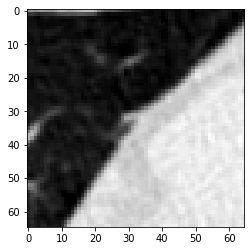

[-208.63 -171.54   99.46]
[127.65000338 217.42581139 398.95308412]
[[0.09928571 0.125      0.12857143 ... 0.05714286 0.06714286 0.08357143]
 [0.075      0.10642857 0.11071429 ... 0.04142857 0.06857143 0.09714286]
 [0.07071429 0.09571429 0.10785714 ... 0.03714286 0.06142857 0.07428571]
 ...
 [0.06285714 0.06571429 0.07214286 ... 0.05714286 0.05642857 0.04785714]
 [0.05714286 0.05857143 0.06071429 ... 0.04928571 0.07857143 0.10928571]
 [0.055      0.03214286 0.01857143 ... 0.08071429 0.12428571 0.19357143]]


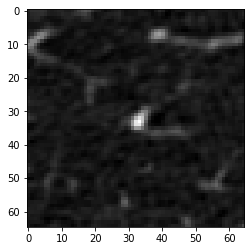

[-285.7  -261.68   70.82]
[ 84.83333558  77.57223564 354.51769018]
[[0.72714286 0.7        0.67571429 ... 0.60071429 0.61928571 0.63285714]
 [0.70285714 0.67928571 0.65714286 ... 0.61642857 0.63928571 0.645     ]
 [0.71428571 0.71857143 0.71       ... 0.61857143 0.62214286 0.63571429]
 ...
 [0.75357143 0.73142857 0.75071429 ... 0.065      0.06214286 0.03928571]
 [0.73357143 0.71928571 0.73       ... 0.03571429 0.03642857 0.02928571]
 [0.72785714 0.73142857 0.73857143 ... 0.02571429 0.03142857 0.01785714]]


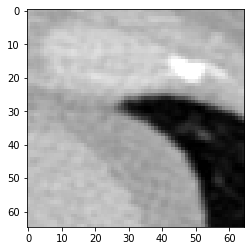

[-221.53 -211.34  -27.68]
[120.48333653 155.67550836 201.69344776]
[[0.06071429 0.02428571 0.02214286 ... 0.66928571 0.65285714 0.65357143]
 [0.06       0.05       0.05357143 ... 0.65       0.65214286 0.64285714]
 [0.04357143 0.05642857 0.055      ... 0.63071429 0.64428571 0.645     ]
 ...
 [0.07       0.06785714 0.07       ... 0.74642857 0.72357143 0.70928571]
 [0.07       0.05928571 0.05428571 ... 0.74785714 0.73642857 0.71357143]
 [0.05285714 0.05785714 0.06642857 ... 0.775      0.77285714 0.74214286]]


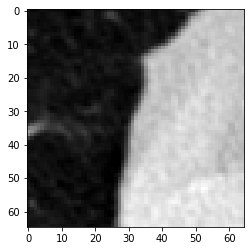

[-177.72 -109.18  -44.16]
[144.82222606 314.17829624 176.12447806]
[[0.07928571 0.08071429 0.06714286 ... 0.04071429 0.02428571 0.04071429]
 [0.08142857 0.07357143 0.06428571 ... 0.06214286 0.05928571 0.05714286]
 [0.07571429 0.07285714 0.05       ... 0.04571429 0.06071429 0.05714286]
 ...
 [0.15285714 0.17714286 0.16857143 ... 0.05       0.04571429 0.05857143]
 [0.11357143 0.11214286 0.13       ... 0.06285714 0.05428571 0.05571429]
 [0.13428571 0.11857143 0.11285714 ... 0.04642857 0.05071429 0.05928571]]


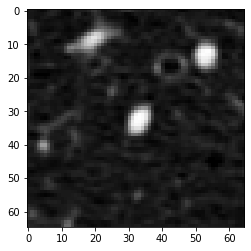

[-203.72 -205.17   39.9 ]
[130.37778123 165.24835685 306.5448417 ]
[[0.03285714 0.02642857 0.03285714 ... 0.06071429 0.06428571 0.05214286]
 [0.01571429 0.00928571 0.02642857 ... 0.05142857 0.04571429 0.03571429]
 [0.01857143 0.02428571 0.04       ... 0.04428571 0.02142857 0.00928571]
 ...
 [0.74571429 0.75785714 0.75714286 ... 0.16357143 0.155      0.06857143]
 [0.74       0.76214286 0.76285714 ... 0.08857143 0.10428571 0.05857143]
 [0.74714286 0.76642857 0.76785714 ... 0.055      0.06928571 0.05928571]]


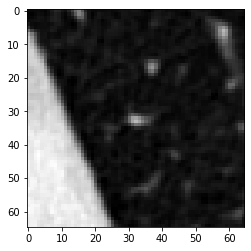

[-301.0161009  -108.7233275   -31.64473106]
[ 76.32439041 314.88683055 195.54210745]
[[0.06       0.07785714 0.06       ... 0.07928571 0.06571429 0.03785714]
 [0.05714286 0.08785714 0.07071429 ... 0.06142857 0.09571429 0.07      ]
 [0.04857143 0.06214286 0.05857143 ... 0.05428571 0.115      0.10714286]
 ...
 [0.14142857 0.15285714 0.20428571 ... 0.17785714 0.28785714 0.48642857]
 [0.08785714 0.08928571 0.16357143 ... 0.255      0.40928571 0.56285714]
 [0.03642857 0.06428571 0.15214286 ... 0.35071429 0.525      0.615     ]]


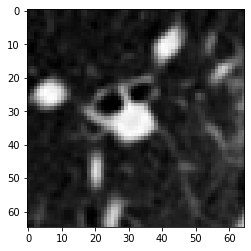

[-213.3388891  -139.1896669   -55.43796687]
[125.03395381 267.61784336 158.62654158]
[[0.04785714 0.04571429 0.03928571 ... 0.04428571 0.03428571 0.03928571]
 [0.05142857 0.06142857 0.055      ... 0.07428571 0.08785714 0.15571429]
 [0.04857143 0.05142857 0.04       ... 0.09214286 0.16642857 0.35285714]
 ...
 [0.71857143 0.69571429 0.55714286 ... 0.51642857 0.56928571 0.35285714]
 [0.67357143 0.66571429 0.52714286 ... 0.46857143 0.52928571 0.32285714]
 [0.42071429 0.39428571 0.28714286 ... 0.415      0.50571429 0.33857143]]


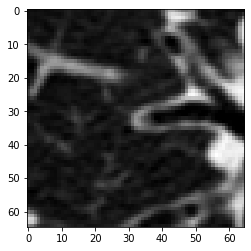

[-280.4914636   -62.03061729  -29.22008071]
[ 87.72696699 387.3312779  199.3039892 ]
[[0.05714286 0.065      0.14071429 ... 0.35571429 0.52214286 0.59428571]
 [0.02642857 0.07357143 0.20642857 ... 0.48071429 0.61857143 0.66071429]
 [0.09571429 0.20428571 0.33428571 ... 0.58428571 0.66071429 0.69571429]
 ...
 [1.         1.         1.         ... 0.71285714 0.71       0.72285714]
 [0.90428571 0.92142857 0.92571429 ... 0.70142857 0.72714286 0.76214286]
 [0.79714286 0.80428571 0.81642857 ... 0.72142857 0.75214286 0.78428571]]


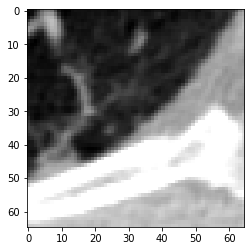

[-261.1721657 -142.1771052  122.5378757]
[ 98.45991055 262.98278757 434.75875793]
[[0.04357143 0.00857143 0.01571429 ... 0.08642857 0.16285714 0.15142857]
 [0.02785714 0.035      0.04       ... 0.06642857 0.13785714 0.12357143]
 [0.04714286 0.07357143 0.07857143 ... 0.06857143 0.12       0.10571429]
 ...
 [0.08142857 0.10928571 0.10071429 ... 0.08285714 0.08928571 0.11428571]
 [0.12071429 0.13357143 0.08214286 ... 0.09       0.08785714 0.08214286]
 [0.12714286 0.12       0.07214286 ... 0.07785714 0.07714286 0.06428571]]


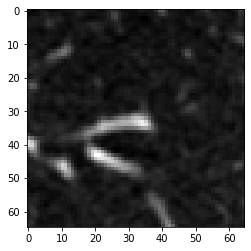

[-262.74 -149.12   54.62]
[ 97.58889147 252.21078109 329.38314473]
[[0.77285714 0.78071429 0.725      ... 0.065      0.06357143 0.07142857]
 [0.76214286 0.76428571 0.74285714 ... 0.03214286 0.05642857 0.06214286]
 [0.73857143 0.76285714 0.77428571 ... 0.01928571 0.03785714 0.03214286]
 ...
 [0.66928571 0.55714286 0.39       ... 0.67571429 0.62428571 0.57428571]
 [0.665      0.6        0.39071429 ... 0.69857143 0.605      0.54071429]
 [0.66571429 0.62285714 0.41214286 ... 0.63214286 0.49785714 0.41428571]]


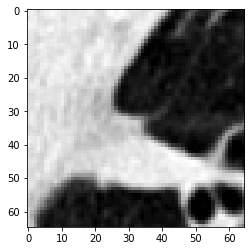

[-290.0613404   -87.24980434  -12.69913526]
[ 82.41036863 348.20332708 224.93648638]
[[0.76428571 0.77       0.76714286 ... 0.92642857 0.94071429 0.92928571]
 [0.65       0.73       0.76142857 ... 0.89571429 0.89571429 0.89428571]
 [0.43142857 0.58       0.67285714 ... 0.86214286 0.84642857 0.865     ]
 ...
 [0.21642857 0.27928571 0.25       ... 0.70214286 0.69714286 0.71428571]
 [0.16571429 0.215      0.20571429 ... 0.705      0.71285714 0.71642857]
 [0.14785714 0.16       0.15857143 ... 0.76785714 0.785      0.76285714]]


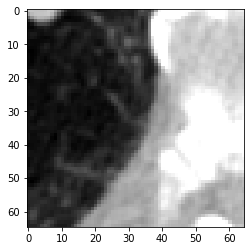

[-129.48 -139.34   53.1 ]
[171.62222677 267.38459927 327.0248417 ]
[[0.79214286 0.82       0.78071429 ... 0.04357143 0.04714286 0.06642857]
 [0.78857143 0.79428571 0.72714286 ... 0.13571429 0.125      0.10285714]
 [0.81357143 0.795      0.715      ... 0.23142857 0.19785714 0.12714286]
 ...
 [0.03       0.07285714 0.12285714 ... 0.11214286 0.15857143 0.15285714]
 [0.04571429 0.07071429 0.08285714 ... 0.075      0.10285714 0.12785714]
 [0.06428571 0.06       0.07785714 ... 0.06928571 0.06714286 0.07214286]]


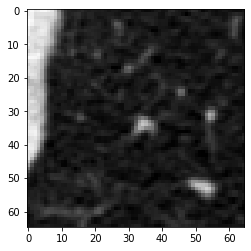

[-134.86 -115.49   72.13]
[168.6333378  304.38823564 356.55017503]
[[0.07714286 0.06285714 0.01214286 ... 0.03214286 0.04214286 0.06      ]
 [0.04928571 0.03214286 0.01785714 ... 0.04428571 0.05142857 0.07785714]
 [0.04571429 0.04       0.05785714 ... 0.07       0.09714286 0.12428571]
 ...
 [0.04642857 0.08285714 0.06       ... 0.09357143 0.07785714 0.07357143]
 [0.02357143 0.04785714 0.04071429 ... 0.10357143 0.07571429 0.06142857]
 [0.05714286 0.08071429 0.10571429 ... 0.06714286 0.05857143 0.07214286]]


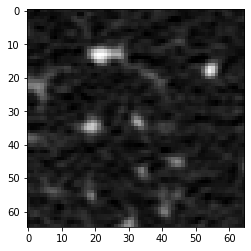

[-190.584327   -189.6072693    36.59627298]
[137.67537754 189.39416933 301.41905917]
[[0.61928571 0.65785714 0.63214286 ... 0.08       0.08357143 0.075     ]
 [0.63       0.66714286 0.63571429 ... 0.08357143 0.07571429 0.05857143]
 [0.65357143 0.685      0.63428571 ... 0.08071429 0.07714286 0.06428571]
 ...
 [0.74714286 0.73785714 0.75214286 ... 0.04642857 0.06142857 0.08785714]
 [0.745      0.75428571 0.75785714 ... 0.05357143 0.07285714 0.06785714]
 [0.76714286 0.78071429 0.755      ... 0.06928571 0.07285714 0.055     ]]


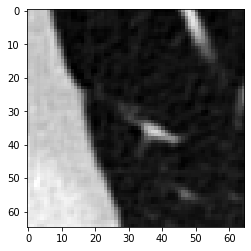

[-246.58  -60.14  -28.75]
[106.56666949 390.26459927 200.03332655]
[[0.08142857 0.05785714 0.055      ... 0.10642857 0.12214286 0.11214286]
 [0.07428571 0.06571429 0.07857143 ... 0.12071429 0.13214286 0.16071429]
 [0.06285714 0.04       0.07142857 ... 0.16428571 0.16785714 0.215     ]
 ...
 [0.84214286 0.81357143 0.79214286 ... 0.76285714 0.75857143 0.72642857]
 [0.81785714 0.80214286 0.78571429 ... 0.755      0.72428571 0.72142857]
 [0.76428571 0.775      0.78714286 ... 0.76714286 0.73428571 0.74571429]]


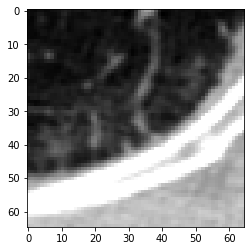

[-286.14 -114.09   -4.6 ]
[ 84.58889113 306.56035685 237.50241745]
[[0.08928571 0.06071429 0.045      ... 0.705      0.69214286 0.74      ]
 [0.07428571 0.05357143 0.015      ... 0.70642857 0.715      0.76142857]
 [0.07642857 0.07       0.03142857 ... 0.71785714 0.72214286 0.75      ]
 ...
 [0.06357143 0.06642857 0.11357143 ... 0.78214286 0.78571429 0.86928571]
 [0.06357143 0.05714286 0.10214286 ... 0.80785714 0.82428571 0.89285714]
 [0.06857143 0.065      0.08571429 ... 0.82785714 0.84571429 0.88142857]]


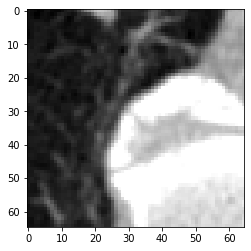

[-308.4668035   -77.25321823 -100.9136231 ]
[ 72.18511108 363.7131819   88.07037192]
[[0.09285714 0.06857143 0.075      ... 0.08785714 0.05714286 0.07      ]
 [0.17642857 0.07928571 0.07642857 ... 0.05785714 0.07714286 0.105     ]
 [0.28857143 0.11428571 0.09642857 ... 0.06428571 0.09214286 0.095     ]
 ...
 [0.66714286 0.63142857 0.63142857 ... 0.63714286 0.66357143 0.67571429]
 [0.63142857 0.625      0.62071429 ... 0.63       0.65714286 0.67857143]
 [0.64357143 0.63071429 0.62       ... 0.62571429 0.63571429 0.66      ]]


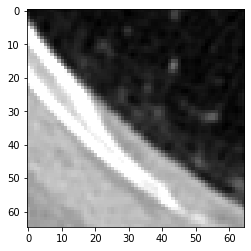

[-336.7  -191.18 -136.18]
[ 56.5000015  186.95405382  33.35405382]
[[0.66428571 0.64857143 0.62142857 ... 0.74       0.74714286 0.77857143]
 [0.66642857 0.64571429 0.61714286 ... 0.72142857 0.70071429 0.72285714]
 [0.63285714 0.64       0.62214286 ... 0.77285714 0.73571429 0.74285714]
 ...
 [0.59642857 0.60285714 0.62571429 ... 0.76928571 0.75071429 0.74428571]
 [0.645      0.62071429 0.655      ... 0.74       0.70214286 0.70857143]
 [0.65       0.63571429 0.71       ... 0.74285714 0.73214286 0.74928571]]


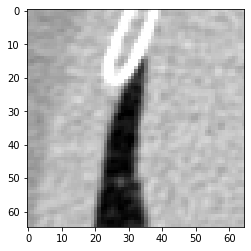

[-315.2252579   -98.72403115 -115.4905878 ]
[ 68.43041409 330.40089034  65.45399032]
[[0.75285714 0.70642857 0.51       ... 0.07142857 0.06142857 0.04428571]
 [0.74357143 0.71785714 0.6        ... 0.05571429 0.03214286 0.03571429]
 [0.77714286 0.73785714 0.69142857 ... 0.04285714 0.01071429 0.03285714]
 ...
 [0.66142857 0.68214286 0.67857143 ... 0.10214286 0.09642857 0.08357143]
 [0.63928571 0.665      0.67071429 ... 0.09785714 0.08928571 0.07285714]
 [0.64142857 0.65071429 0.64357143 ... 0.09571429 0.085      0.07571429]]


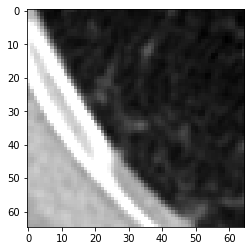

[-156.66 -179.68  -21.45]
[156.52222637 204.79647806 211.35938715]
[[0.08142857 0.08928571 0.095      ... 0.33642857 0.53357143 0.59571429]
 [0.05357143 0.07       0.07928571 ... 0.43857143 0.6        0.61785714]
 [0.04642857 0.07285714 0.07142857 ... 0.53857143 0.65785714 0.65142857]
 ...
 [0.09214286 0.08357143 0.05571429 ... 0.68142857 0.68142857 0.67642857]
 [0.07785714 0.04428571 0.02571429 ... 0.66142857 0.66142857 0.65214286]
 [0.06642857 0.03928571 0.045      ... 0.66857143 0.65642857 0.64428571]]


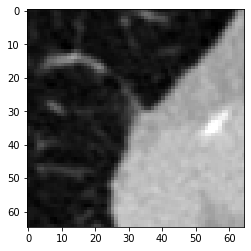

[-315.2203181   -70.24237449  -88.47461671]
[ 68.43315842 374.59061219 107.3696788 ]
[[0.13071429 0.08       0.08714286 ... 0.12071429 0.12071429 0.10142857]
 [0.15928571 0.10285714 0.095      ... 0.13214286 0.12357143 0.09928571]
 [0.17571429 0.125      0.11428571 ... 0.10142857 0.09571429 0.07285714]
 ...
 [0.62785714 0.63928571 0.63785714 ... 0.69       0.70071429 0.73357143]
 [0.64857143 0.64714286 0.64285714 ... 0.72857143 0.73571429 0.77071429]
 [0.63428571 0.61928571 0.63285714 ... 0.76785714 0.78428571 0.79785714]]


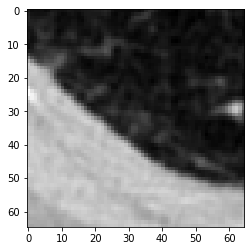

[-204.2589746 -176.242231   105.5286998]
[130.07835089 210.13022875 408.36876381]
[[0.07857143 0.08071429 0.10214286 ... 0.05       0.04142857 0.01928571]
 [0.09357143 0.09071429 0.105      ... 0.05928571 0.05142857 0.025     ]
 [0.08357143 0.09928571 0.10357143 ... 0.09142857 0.06       0.04357143]
 ...
 [0.05571429 0.05571429 0.055      ... 0.09357143 0.12142857 0.09714286]
 [0.055      0.07571429 0.08642857 ... 0.04357143 0.06       0.06      ]
 [0.05714286 0.06       0.07428571 ... 0.025      0.03       0.03928571]]


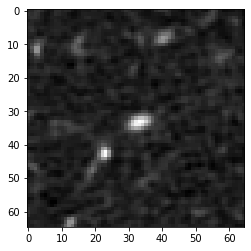

[-131.87 -153.01   39.32]
[170.29444896 246.17538715 305.64496291]
[[0.65428571 0.68642857 0.64357143 ... 0.15       0.15928571 0.15142857]
 [0.71142857 0.70428571 0.65214286 ... 0.10285714 0.13428571 0.14071429]
 [0.71857143 0.70285714 0.67071429 ... 0.07857143 0.11928571 0.13857143]
 ...
 [0.75071429 0.73428571 0.69928571 ... 0.06428571 0.07214286 0.05857143]
 [0.73071429 0.725      0.71142857 ... 0.09714286 0.07785714 0.06785714]
 [0.72142857 0.67928571 0.67285714 ... 0.07071429 0.05       0.02785714]]


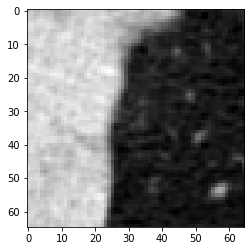

[-179.83 -110.59  -15.44]
[143.65000381 311.99065988 220.68399321]
[[0.         0.00857143 0.035      ... 0.03071429 0.015      0.01071429]
 [0.01357143 0.01357143 0.01285714 ... 0.00642857 0.01285714 0.02928571]
 [0.06071429 0.04214286 0.01       ... 0.         0.         0.00857143]
 ...
 [0.065      0.11285714 0.135      ... 0.87357143 0.89214286 0.91857143]
 [0.135      0.15928571 0.13       ... 0.84285714 0.86       0.87285714]
 [0.115      0.11571429 0.09714286 ... 0.89571429 0.85785714 0.84714286]]


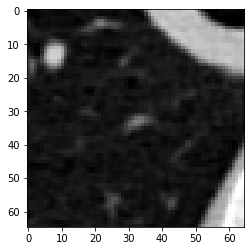

[-295.37 -153.9    56.71]
[ 79.46111322 244.79453867 332.62581139]
[[0.72928571 0.73785714 0.75071429 ... 0.03357143 0.04285714 0.05357143]
 [0.72785714 0.73       0.75428571 ... 0.05785714 0.04928571 0.06857143]
 [0.72928571 0.72571429 0.74714286 ... 0.08071429 0.07285714 0.06785714]
 ...
 [0.67428571 0.61928571 0.55214286 ... 0.05642857 0.06071429 0.07928571]
 [0.68714286 0.67285714 0.66571429 ... 0.04857143 0.07714286 0.08785714]
 [0.73714286 0.71714286 0.72       ... 0.02071429 0.04214286 0.06      ]]


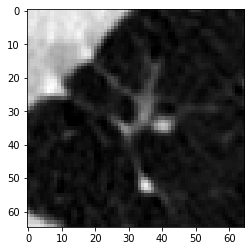

[-244.0170277  -128.7845602   -34.42391144]
[107.99054303 283.76152405 191.23016698]
[[0.15714286 0.30357143 0.46285714 ... 0.75428571 0.70714286 0.72357143]
 [0.13214286 0.28714286 0.5        ... 0.74285714 0.69428571 0.73928571]
 [0.125      0.27714286 0.48142857 ... 0.72       0.70857143 0.74785714]
 ...
 [0.06857143 0.07785714 0.06642857 ... 0.09571429 0.06785714 0.03642857]
 [0.07714286 0.07571429 0.05857143 ... 0.085      0.09857143 0.075     ]
 [0.05571429 0.04071429 0.03142857 ... 0.06714286 0.07857143 0.08357143]]


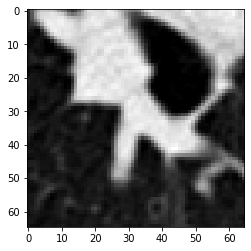

[-295.46 -144.94  -91.72]
[ 79.41111321 258.69611442 102.33441745]
[[0.02714286 0.025      0.02857143 ... 0.345      0.43071429 0.44857143]
 [0.03214286 0.03428571 0.04642857 ... 0.36       0.45928571 0.45428571]
 [0.03       0.03214286 0.04785714 ... 0.34357143 0.35357143 0.27571429]
 ...
 [0.065      0.06357143 0.05428571 ... 0.06857143 0.08785714 0.085     ]
 [0.065      0.06928571 0.05714286 ... 0.065      0.05642857 0.03642857]
 [0.05357143 0.03428571 0.03785714 ... 0.085      0.05785714 0.03928571]]


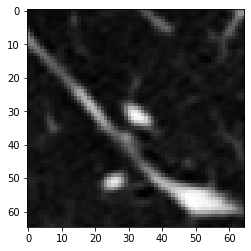

[-359.4825564 -120.1404229  134.7151269]
[ 43.84302538 297.17303405 453.65194768]
[[0.81714286 0.77285714 0.77714286 ... 0.09714286 0.09142857 0.10071429]
 [0.77857143 0.77857143 0.835      ... 0.04214286 0.10142857 0.15357143]
 [0.72357143 0.69642857 0.75428571 ... 0.01928571 0.07428571 0.185     ]
 ...
 [0.13714286 0.07928571 0.055      ... 0.65214286 0.66642857 0.61142857]
 [0.12428571 0.09428571 0.08       ... 0.65785714 0.66714286 0.66642857]
 [0.12214286 0.08857143 0.08       ... 0.67071429 0.67142857 0.69785714]]


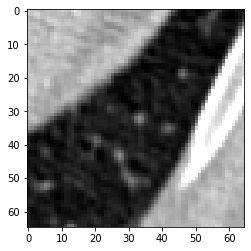

[-242.9659577 -104.8708726  118.4976168]
[108.57447082 320.86397269 428.49023504]
[[0.03571429 0.035      0.05071429 ... 0.05857143 0.05714286 0.06571429]
 [0.05142857 0.05928571 0.05857143 ... 0.07928571 0.08357143 0.09642857]
 [0.06642857 0.06071429 0.04928571 ... 0.12857143 0.12071429 0.11642857]
 ...
 [0.13428571 0.18928571 0.15785714 ... 0.73714286 0.665      0.61857143]
 [0.18214286 0.23428571 0.17428571 ... 0.70928571 0.64428571 0.63428571]
 [0.18857143 0.24785714 0.19928571 ... 0.70428571 0.67857143 0.66785714]]


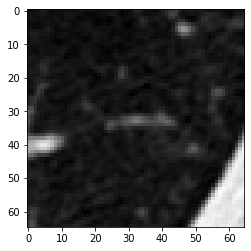

[-211.2   -70.18  -85.18]
[126.22222557 374.68738715 112.48132655]
[[0.86857143 0.72714286 0.67214286 ... 0.06571429 0.09428571 0.11      ]
 [1.         0.81714286 0.71357143 ... 0.07357143 0.09071429 0.10357143]
 [1.         0.93071429 0.75142857 ... 0.08928571 0.07714286 0.07285714]
 ...
 [0.76214286 0.73142857 0.73857143 ... 0.72785714 0.70714286 0.68214286]
 [0.75785714 0.72714286 0.715      ... 0.69785714 0.70142857 0.70285714]
 [0.74928571 0.75928571 0.735      ... 0.68642857 0.68928571 0.68785714]]


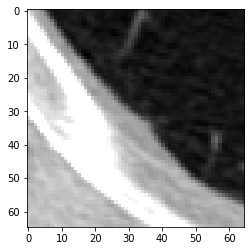

[-287.93 -163.41  142.96]
[ 83.59444666 230.03962958 466.44399321]
[[0.03642857 0.03357143 0.04       ... 0.67071429 0.66857143 0.68142857]
 [0.02928571 0.03285714 0.03571429 ... 0.68428571 0.66       0.67714286]
 [0.04071429 0.04928571 0.04642857 ... 0.69785714 0.665      0.68142857]
 ...
 [0.06928571 0.04714286 0.06214286 ... 0.74857143 0.76857143 0.74714286]
 [0.06       0.04357143 0.06214286 ... 0.74714286 0.75571429 0.72857143]
 [0.06142857 0.06571429 0.075      ... 0.74642857 0.73785714 0.72785714]]


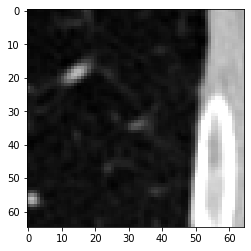

[-278.19 -148.42  -42.06]
[ 89.00555791 253.2968417  179.38265988]
[[0.14642857 0.10857143 0.06       ... 0.74       0.73071429 0.72642857]
 [0.145      0.12714286 0.09285714 ... 0.77142857 0.73285714 0.72357143]
 [0.11285714 0.10285714 0.10642857 ... 0.75714286 0.73071429 0.72214286]
 ...
 [0.31785714 0.31357143 0.265      ... 0.10071429 0.06714286 0.08357143]
 [0.24857143 0.25142857 0.215      ... 0.06071429 0.08357143 0.12571429]
 [0.11642857 0.11428571 0.10285714 ... 0.06785714 0.09       0.14285714]]


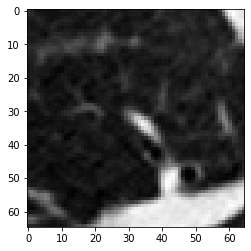

[-278.91 -218.39 -114.25]
[ 88.6055579  144.73732655  67.37878109]
[[0.65142857 0.65       0.66142857 ... 0.415      0.19071429 0.05      ]
 [0.63428571 0.63285714 0.64142857 ... 0.23071429 0.07285714 0.02142857]
 [0.63357143 0.635      0.63857143 ... 0.08928571 0.04857143 0.05714286]
 ...
 [0.70571429 0.67642857 0.70857143 ... 0.09928571 0.09285714 0.10357143]
 [0.68785714 0.67357143 0.71785714 ... 0.23       0.22642857 0.23357143]
 [0.68642857 0.70142857 0.74857143 ... 0.36928571 0.375      0.36857143]]


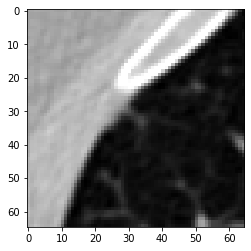

[-244.0298675  -111.9169008    75.15109415]
[107.98340981 309.93195318 361.23744838]
[[0.72357143 0.755      0.77142857 ... 0.06071429 0.05642857 0.06357143]
 [0.63642857 0.69857143 0.77857143 ... 0.03785714 0.05357143 0.06142857]
 [0.41857143 0.51857143 0.65071429 ... 0.04428571 0.05857143 0.06785714]
 ...
 [0.69714286 0.51428571 0.29428571 ... 0.07714286 0.08928571 0.11571429]
 [0.57285714 0.35       0.15785714 ... 0.09642857 0.11714286 0.13      ]
 [0.39571429 0.19285714 0.07571429 ... 0.09214286 0.10142857 0.09785714]]


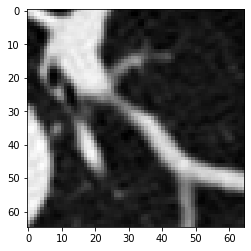

[-229.01 -124.6   -83.4 ]
[116.32778086 290.25393261 115.24302352]
[[0.08428571 0.11642857 0.14642857 ... 0.06285714 0.06357143 0.04571429]
 [0.07071429 0.09071429 0.09142857 ... 0.07       0.06714286 0.03428571]
 [0.05285714 0.065      0.065      ... 0.04857143 0.05357143 0.05357143]
 ...
 [0.11357143 0.12071429 0.10357143 ... 0.11785714 0.12571429 0.105     ]
 [0.09571429 0.10214286 0.10928571 ... 0.06857143 0.08071429 0.09928571]
 [0.09142857 0.07714286 0.10285714 ... 0.05642857 0.06214286 0.06928571]]


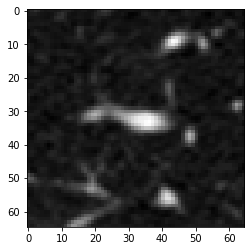

[-227.41  -96.82   79.18]
[117.21666977 333.35502352 367.48835685]
[[0.12571429 0.26928571 0.27785714 ... 0.07214286 0.02785714 0.01857143]
 [0.16357143 0.26357143 0.18642857 ... 0.04142857 0.03785714 0.04214286]
 [0.24928571 0.23785714 0.08857143 ... 0.03       0.05285714 0.06142857]
 ...
 [0.16214286 0.16785714 0.12357143 ... 0.06285714 0.06285714 0.055     ]
 [0.19214286 0.20142857 0.16142857 ... 0.06571429 0.07357143 0.08857143]
 [0.17928571 0.19142857 0.18214286 ... 0.09357143 0.105      0.10285714]]


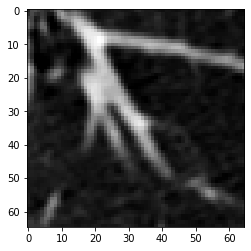

[-229.5561786  -153.1909196    69.71917308]
[116.0243483  245.89468765 352.80974054]
[[0.73       0.61928571 0.33928571 ... 0.12928571 0.16357143 0.13142857]
 [0.75       0.61357143 0.30357143 ... 0.14571429 0.16857143 0.12357143]
 [0.74642857 0.59642857 0.28785714 ... 0.13142857 0.12214286 0.085     ]
 ...
 [0.         0.02071429 0.08857143 ... 0.11071429 0.115      0.10142857]
 [0.15071429 0.22785714 0.33642857 ... 0.10071429 0.115      0.10214286]
 [0.41642857 0.525      0.62357143 ... 0.10714286 0.11285714 0.10071429]]


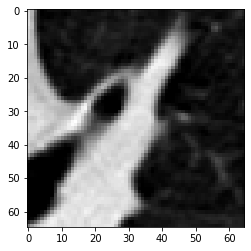

[-271.0451842  -107.3993529   -65.51767465]
[ 92.97490013 316.9409972  142.98772224]
[[0.06       0.07642857 0.09       ... 0.09928571 0.06142857 0.04714286]
 [0.02571429 0.03285714 0.04571429 ... 0.10428571 0.06928571 0.05142857]
 [0.04285714 0.05571429 0.05142857 ... 0.16571429 0.11357143 0.09      ]
 ...
 [0.09714286 0.09928571 0.08285714 ... 0.14571429 0.28142857 0.40785714]
 [0.13285714 0.135      0.12214286 ... 0.23857143 0.35214286 0.40357143]
 [0.11428571 0.12642857 0.14214286 ... 0.31571429 0.37214286 0.38214286]]


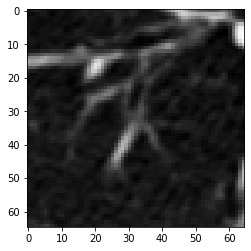

[-372.927778  -100.6341113  111.8842553]
[ 36.37345763 327.43737204 418.22950447]
[[0.74357143 0.64642857 0.64428571 ... 0.73928571 0.75428571 0.76714286]
 [0.74357143 0.68571429 0.65928571 ... 0.72357143 0.73928571 0.755     ]
 [0.76071429 0.72142857 0.685      ... 0.75142857 0.75428571 0.76714286]
 ...
 [0.09071429 0.09642857 0.17785714 ... 0.74642857 0.74       0.765     ]
 [0.12214286 0.08       0.135      ... 0.78571429 0.75571429 0.74285714]
 [0.11428571 0.095      0.09357143 ... 0.83571429 0.77642857 0.715     ]]


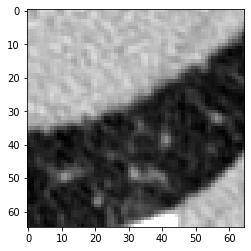

[-321.4   -152.39   130.735]
[ 65.00000172 247.13732655 447.47672048]
[[0.01357143 0.03357143 0.055      ... 0.06714286 0.07642857 0.06571429]
 [0.02571429 0.01       0.02642857 ... 0.07428571 0.07785714 0.08142857]
 [0.08928571 0.02714286 0.02428571 ... 0.07642857 0.085      0.11714286]
 ...
 [0.075      0.09642857 0.10428571 ... 0.08071429 0.06928571 0.05357143]
 [0.07714286 0.09214286 0.10571429 ... 0.06357143 0.07142857 0.07357143]
 [0.05428571 0.05857143 0.08285714 ... 0.05285714 0.075      0.07785714]]


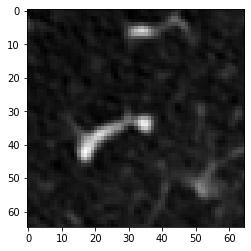

[-197.17  -97.49   -0.8 ]
[134.01667022 332.31550836 243.39817503]
[[0.06857143 0.07857143 0.06285714 ... 0.69       0.73357143 0.75714286]
 [0.075      0.07714286 0.06142857 ... 0.63428571 0.65857143 0.67642857]
 [0.09571429 0.1        0.065      ... 0.65857143 0.66785714 0.66714286]
 ...
 [0.06928571 0.08285714 0.06142857 ... 1.         1.         1.        ]
 [0.09571429 0.09142857 0.08714286 ... 1.         1.         1.        ]
 [0.10571429 0.11142857 0.11       ... 1.         1.         1.        ]]


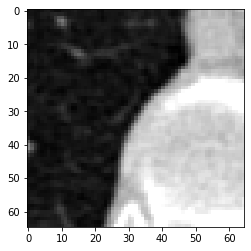

[-369.2   -89.68  125.66]
[ 38.44444546 344.4328417  439.60278109]
[[0.73785714 0.70142857 0.75571429 ... 0.715      0.70785714 0.70714286]
 [0.73571429 0.76928571 0.80928571 ... 0.68142857 0.68071429 0.70428571]
 [0.75928571 0.80357143 0.83428571 ... 0.76285714 0.71571429 0.69642857]
 ...
 [0.96214286 1.         1.         ... 0.65285714 0.69214286 0.66642857]
 [1.         1.         1.         ... 0.65785714 0.65785714 0.65357143]
 [1.         1.         1.         ... 0.645      0.62785714 0.61071429]]


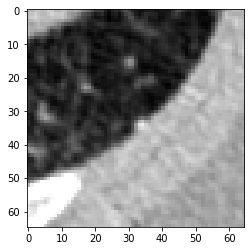

[-250.53 -160.34  118.92]
[104.37222499 234.80278109 429.14556897]
[[0.08714286 0.04142857 0.03571429 ... 0.07642857 0.08571429 0.10357143]
 [0.02785714 0.025      0.02285714 ... 0.06642857 0.08142857 0.10071429]
 [0.02357143 0.04785714 0.05785714 ... 0.04285714 0.05714286 0.07428571]
 ...
 [0.02928571 0.04571429 0.05071429 ... 0.18357143 0.04142857 0.02642857]
 [0.06       0.07928571 0.08642857 ... 0.23642857 0.08071429 0.04428571]
 [0.055      0.06571429 0.07928571 ... 0.24857143 0.13642857 0.07142857]]


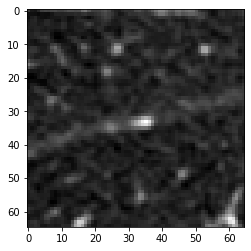

[-209.12 -228.91   49.71]
[127.37778115 128.41538715 321.76520533]
[[0.08785714 0.06928571 0.08142857 ... 0.79642857 0.85428571 0.94857143]
 [0.07142857 0.09928571 0.12285714 ... 0.78571429 0.84214286 0.94      ]
 [0.04928571 0.10428571 0.14428571 ... 0.68214286 0.73357143 0.80071429]
 ...
 [0.67928571 0.54571429 0.39928571 ... 0.03928571 0.04357143 0.05071429]
 [0.71214286 0.62428571 0.49928571 ... 0.04       0.05714286 0.05785714]
 [0.71428571 0.65357143 0.56285714 ... 0.03571429 0.05571429 0.06285714]]


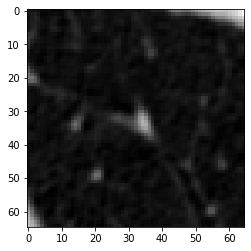

[-216.455 -120.945  -75.835]
[123.30278104 295.92472048 126.98023564]
[[0.10285714 0.09285714 0.08142857 ... 0.09857143 0.09142857 0.10142857]
 [0.09214286 0.09857143 0.09357143 ... 0.13214286 0.15857143 0.195     ]
 [0.12285714 0.13071429 0.11071429 ... 0.075      0.12714286 0.17142857]
 ...
 [0.10714286 0.09357143 0.07642857 ... 0.105      0.155      0.16142857]
 [0.08       0.09071429 0.1        ... 0.09071429 0.15285714 0.185     ]
 [0.04428571 0.05142857 0.06142857 ... 0.10285714 0.11785714 0.13214286]]


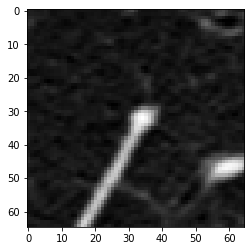

[-318.095165  -154.3719088 -131.2566225]
[ 66.83602121 244.06236501  40.99274861]
[[0.62285714 0.65571429 0.67714286 ... 0.73       0.76       0.78857143]
 [0.64642857 0.65142857 0.66857143 ... 0.72428571 0.76428571 0.805     ]
 [0.64071429 0.64785714 0.67857143 ... 0.76357143 0.75785714 0.775     ]
 ...
 [0.71071429 0.71285714 0.72285714 ... 0.07857143 0.05285714 0.05142857]
 [0.74285714 0.73428571 0.72714286 ... 0.08857143 0.06571429 0.05142857]
 [0.75714286 0.74428571 0.69857143 ... 0.11857143 0.08571429 0.05214286]]


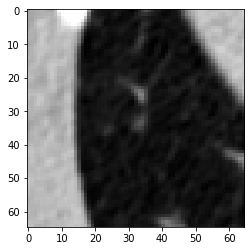

[-189.66 -135.11   59.52]
[138.18889255 273.94750836 336.98556897]
[[0.07642857 0.10571429 0.145      ... 0.07       0.07       0.075     ]
 [0.05428571 0.08785714 0.16785714 ... 0.08571429 0.10071429 0.08928571]
 [0.07285714 0.10928571 0.20428571 ... 0.08785714 0.09285714 0.07928571]
 ...
 [0.74142857 0.75357143 0.75071429 ... 0.10642857 0.075      0.06642857]
 [0.815      0.765      0.71285714 ... 0.08642857 0.05142857 0.03071429]
 [0.81428571 0.755      0.72642857 ... 0.06642857 0.04       0.035     ]]


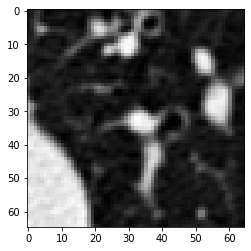

[-244.87 -195.51 -102.09]
[107.51666951 180.23599321  86.24520533]
[[0.655      0.66785714 0.70071429 ... 0.18428571 0.20571429 0.23571429]
 [0.69357143 0.68357143 0.71071429 ... 0.14571429 0.15857143 0.19      ]
 [0.73642857 0.75642857 0.76214286 ... 0.07857143 0.08857143 0.11142857]
 ...
 [1.         1.         0.64214286 ... 0.08285714 0.06071429 0.05214286]
 [1.         0.99428571 0.53       ... 0.08285714 0.05428571 0.03      ]
 [1.         0.925      0.44928571 ... 0.07857143 0.04928571 0.01357143]]


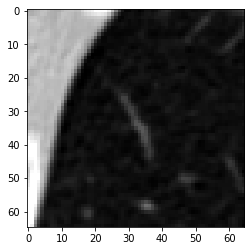

[-279.7  -200.68 -124.68]
[ 88.166669   172.21465988  51.19647806]
[[0.67428571 0.64857143 0.66142857 ... 0.06428571 0.05142857 0.05714286]
 [0.68       0.66142857 0.67357143 ... 0.07214286 0.06857143 0.055     ]
 [0.655      0.64428571 0.65785714 ... 0.08071429 0.06071429 0.02714286]
 ...
 [0.73714286 0.73928571 0.74142857 ... 0.37       0.28357143 0.14071429]
 [0.75642857 0.74642857 0.75       ... 0.28785714 0.255      0.15214286]
 [0.76642857 0.75214286 0.76714286 ... 0.12571429 0.13571429 0.11142857]]


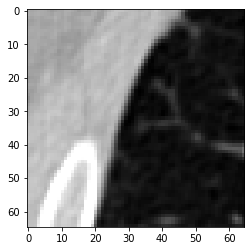

[-243.06 -168.74   77.04]
[108.5222251  221.77005382 364.16811442]
[[0.75928571 0.75785714 0.76357143 ... 0.13571429 0.15       0.20071429]
 [0.74857143 0.76214286 0.77428571 ... 0.16142857 0.17857143 0.21642857]
 [0.75571429 0.77214286 0.77       ... 0.18214286 0.19357143 0.19214286]
 ...
 [0.07071429 0.08285714 0.08214286 ... 0.09285714 0.06571429 0.04857143]
 [0.10285714 0.12357143 0.12642857 ... 0.085      0.07571429 0.06      ]
 [0.08785714 0.08571429 0.105      ... 0.07071429 0.06142857 0.06642857]]


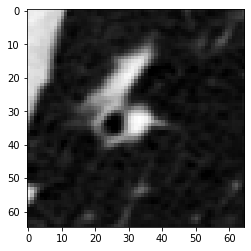

[-390.61  -86.06  -53.27]
[ 26.5500007  350.04932655 161.99017503]
[[0.885      0.89357143 0.79285714 ... 0.58214286 0.625      0.68785714]
 [0.81214286 0.76714286 0.72857143 ... 0.57928571 0.66214286 0.7       ]
 [0.79357143 0.74214286 0.71357143 ... 0.65928571 0.65428571 0.63642857]
 ...
 [0.70571429 0.77428571 0.80857143 ... 0.69357143 0.83285714 0.85      ]
 [0.74714286 0.83       0.82       ... 0.69857143 0.81142857 0.76285714]
 [0.72571429 0.74928571 0.75357143 ... 0.76142857 0.78857143 0.755     ]]


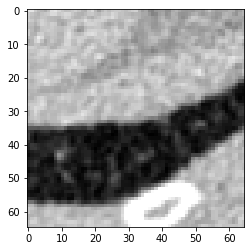

[-270.46  -91.67  -98.81]
[ 93.30000247 341.34532655  91.33417503]
[[0.135      0.08642857 0.055      ... 0.05785714 0.045      0.04571429]
 [0.13857143 0.10357143 0.07928571 ... 0.04642857 0.05071429 0.07428571]
 [0.11857143 0.10214286 0.09428571 ... 0.06285714 0.075      0.11428571]
 ...
 [0.77357143 0.75928571 0.71785714 ... 0.09214286 0.10357143 0.09214286]
 [0.77357143 0.78428571 0.74571429 ... 0.08857143 0.08642857 0.07142857]
 [0.75       0.76142857 0.74642857 ... 0.06714286 0.05928571 0.05071429]]


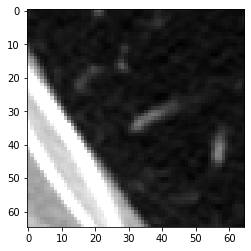

[-258.52 -243.01   66.53]
[ 99.93333598 106.53902352 347.86169018]
[[0.40285714 0.4        0.325      ... 1.         1.         1.        ]
 [0.40571429 0.31214286 0.18142857 ... 1.         1.         1.        ]
 [0.36285714 0.22928571 0.11928571 ... 0.98714286 1.         1.        ]
 ...
 [0.76785714 0.80285714 0.78142857 ... 0.02071429 0.03214286 0.03357143]
 [0.78714286 0.81071429 0.78142857 ... 0.025      0.05       0.06214286]
 [0.76       0.77928571 0.78714286 ... 0.02928571 0.05857143 0.07857143]]


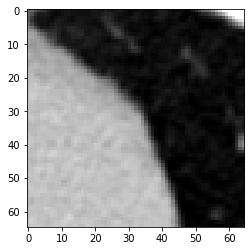

[-248.1  -122.58  124.17]
[105.72222502 293.38799321 437.29102352]
[[0.05285714 0.03357143 0.03571429 ... 0.07428571 0.06       0.02928571]
 [0.08071429 0.07357143 0.06214286 ... 0.06285714 0.05714286 0.04285714]
 [0.09357143 0.1        0.08214286 ... 0.06       0.06357143 0.06285714]
 ...
 [0.06642857 0.07571429 0.08714286 ... 0.76071429 0.71357143 0.68642857]
 [0.07       0.05928571 0.05928571 ... 0.74       0.705      0.72357143]
 [0.08071429 0.055      0.04214286 ... 0.72071429 0.71142857 0.73785714]]


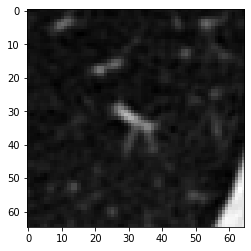

[-302.95 -179.05 -102.3 ]
[ 75.25000199 205.77393261  85.91938715]
[[0.15928571 0.16071429 0.125      ... 0.76       0.73642857 0.75214286]
 [0.13571429 0.14785714 0.14428571 ... 0.75214286 0.75357143 0.77642857]
 [0.09214286 0.11857143 0.14357143 ... 0.75285714 0.79357143 0.795     ]
 ...
 [0.11928571 0.1        0.06642857 ... 0.05071429 0.04071429 0.04      ]
 [0.10428571 0.07       0.045      ... 0.03857143 0.03714286 0.04857143]
 [0.08357143 0.06214286 0.06142857 ... 0.06285714 0.05642857 0.06428571]]


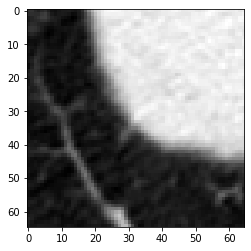

[-249.39 -156.83  -35.76]
[105.00555834 240.24859927 189.15720533]
[[0.05142857 0.07785714 0.15428571 ... 0.73214286 0.75714286 0.74857143]
 [0.03142857 0.075      0.18214286 ... 0.75285714 0.73357143 0.72071429]
 [0.04071429 0.08357143 0.19714286 ... 0.75       0.72357143 0.70785714]
 ...
 [0.11142857 0.11428571 0.12642857 ... 0.02785714 0.03571429 0.07285714]
 [0.06857143 0.07071429 0.105      ... 0.01       0.03       0.05642857]
 [0.04857143 0.05214286 0.035      ... 0.03142857 0.04357143 0.05      ]]


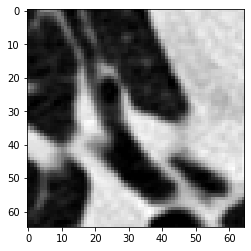

[-245.45 -205.43  -67.68]
[107.19444728 164.84496291 139.6328417 ]
[[0.02285714 0.04785714 0.04357143 ... 0.07428571 0.07785714 0.08071429]
 [0.025      0.03785714 0.04214286 ... 0.07642857 0.065      0.05857143]
 [0.03642857 0.03928571 0.05214286 ... 0.07142857 0.04071429 0.02071429]
 ...
 [0.04714286 0.05571429 0.06428571 ... 0.07857143 0.08714286 0.08071429]
 [0.05928571 0.07       0.05214286 ... 0.07785714 0.06571429 0.06928571]
 [0.03928571 0.04285714 0.02785714 ... 0.06642857 0.05357143 0.05142857]]


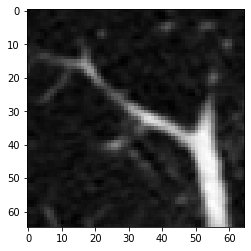

[-314.4740032  -166.8380119    34.86907027]
[ 68.84777782 224.72101717 298.73927799]
[[0.63642857 0.62714286 0.60214286 ... 0.16071429 0.15428571 0.14785714]
 [0.62357143 0.62928571 0.58857143 ... 0.15785714 0.15       0.14714286]
 [0.67357143 0.65142857 0.58428571 ... 0.16       0.16142857 0.185     ]
 ...
 [0.09071429 0.10928571 0.32071429 ... 0.06857143 0.095      0.11785714]
 [0.06857143 0.09071429 0.31428571 ... 0.085      0.09785714 0.11214286]
 [0.06714286 0.12214286 0.33071429 ... 0.10357143 0.09571429 0.09785714]]


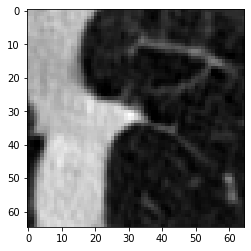

[-239.55  -98.08   -0.78]
[110.47222515 331.40011442 243.42920533]
[[0.08785714 0.09142857 0.10857143 ... 0.04571429 0.05785714 0.05071429]
 [0.15785714 0.145      0.15571429 ... 0.03785714 0.04285714 0.05785714]
 [0.17       0.14714286 0.14928571 ... 0.01571429 0.02785714 0.05142857]
 ...
 [0.09857143 0.08357143 0.09214286 ... 0.93357143 0.93857143 0.91928571]
 [0.09285714 0.09357143 0.11285714 ... 0.91857143 0.90571429 0.86928571]
 [0.10142857 0.10642857 0.11142857 ... 0.91071429 0.88642857 0.84857143]]


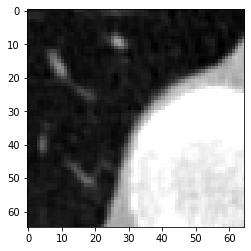

[-191.07 -140.71  107.16]
[137.4055592  265.25902352 410.89975079]
[[0.05857143 0.06       0.06857143 ... 0.16357143 0.13428571 0.12928571]
 [0.055      0.04571429 0.055      ... 0.19285714 0.14928571 0.12071429]
 [0.05214286 0.04142857 0.04       ... 0.15428571 0.13928571 0.11071429]
 ...
 [0.06571429 0.08714286 0.11142857 ... 0.08928571 0.09642857 0.09928571]
 [0.09571429 0.08857143 0.09071429 ... 0.07285714 0.04428571 0.03      ]
 [0.09214286 0.06142857 0.05142857 ... 0.05714286 0.02571429 0.04214286]]


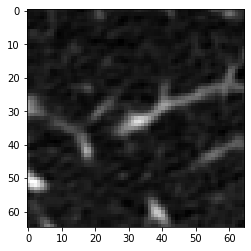

[-172.11 -108.13    5.23]
[147.93889281 315.80738715 252.75381139]
[[0.03357143 0.06       0.08285714 ... 0.71857143 0.76071429 0.75714286]
 [0.07428571 0.11285714 0.12928571 ... 0.69642857 0.73214286 0.72357143]
 [0.11285714 0.12857143 0.10642857 ... 0.74857143 0.73714286 0.70928571]
 ...
 [0.09785714 0.10642857 0.07857143 ... 0.80857143 0.76071429 0.78571429]
 [0.10285714 0.07571429 0.04       ... 0.85571429 0.81714286 0.80285714]
 [0.10428571 0.08642857 0.06857143 ... 0.89928571 0.88357143 0.86928571]]


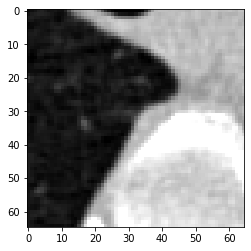

[-282.8905001  -77.7066501   92.7208499]
[ 86.3941689  363.00967548 388.49719063]
[[0.15071429 0.10428571 0.08       ... 0.11285714 0.14357143 0.15357143]
 [0.21928571 0.16       0.11714286 ... 0.18214286 0.22357143 0.19214286]
 [0.23928571 0.16714286 0.12142857 ... 0.24357143 0.29428571 0.24      ]
 ...
 [0.95142857 0.96357143 1.         ... 0.69642857 0.67857143 0.67285714]
 [0.91928571 0.90285714 0.92214286 ... 0.685      0.68571429 0.69714286]
 [0.96       0.91714286 0.90142857 ... 0.67571429 0.68285714 0.72142857]]


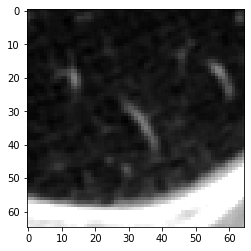

[-278.2127519   -66.11088409   93.81427024]
[ 88.99291797 381.00068214 390.19364886]
[[0.12071429 0.09714286 0.095      ... 0.09428571 0.09       0.07714286]
 [0.10642857 0.09428571 0.08785714 ... 0.12214286 0.11285714 0.105     ]
 [0.10428571 0.11642857 0.10142857 ... 0.11571429 0.09642857 0.08571429]
 ...
 [0.77642857 0.77714286 0.76714286 ... 0.63357143 0.62428571 0.63785714]
 [0.77214286 0.76071429 0.73928571 ... 0.65785714 0.65571429 0.65714286]
 [0.78285714 0.77142857 0.755      ... 0.68642857 0.67428571 0.66642857]]


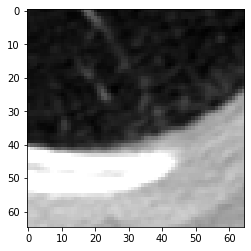

[-217.77 -110.59  -61.68]
[122.57222547 311.99065988 148.94193261]
[[0.05       0.04071429 0.03714286 ... 0.75214286 0.77071429 0.77785714]
 [0.07785714 0.08214286 0.06857143 ... 0.70285714 0.75142857 0.75285714]
 [0.08357143 0.08571429 0.065      ... 0.70071429 0.75857143 0.76071429]
 ...
 [0.10642857 0.07785714 0.05357143 ... 0.09214286 0.08714286 0.07      ]
 [0.10428571 0.06928571 0.06928571 ... 0.08571429 0.095      0.08928571]
 [0.055      0.06714286 0.09785714 ... 0.10928571 0.11142857 0.095     ]]


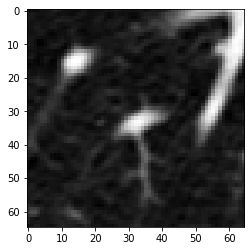

[-330.09  -131.89   -95.395]
[ 60.17222382 278.94338715  96.63259927]
[[0.805      0.77785714 0.745      ... 0.77285714 0.76       0.80857143]
 [0.79285714 0.74428571 0.72857143 ... 0.77214286 0.77142857 0.77857143]
 [0.74785714 0.715      0.73428571 ... 0.76       0.77142857 0.76      ]
 ...
 [0.12714286 0.09857143 0.05928571 ... 0.05928571 0.05642857 0.07142857]
 [0.15642857 0.10357143 0.055      ... 0.09214286 0.07357143 0.04857143]
 [0.14       0.06214286 0.04428571 ... 0.11       0.08285714 0.03285714]]


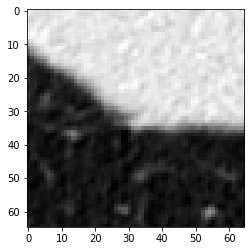

[-318.95 -128.1    86.14]
[ 66.36111287 284.82362958 378.2869023 ]
[[0.085      0.11357143 0.10857143 ... 0.11285714 0.11857143 0.10571429]
 [0.07       0.09357143 0.10571429 ... 0.09071429 0.09285714 0.07928571]
 [0.04785714 0.06428571 0.10285714 ... 0.06785714 0.05928571 0.06071429]
 ...
 [0.09928571 0.07285714 0.04785714 ... 0.23571429 0.39857143 0.57071429]
 [0.09857143 0.08785714 0.06357143 ... 0.09642857 0.21       0.35714286]
 [0.10428571 0.10642857 0.08928571 ... 0.02571429 0.07928571 0.15428571]]


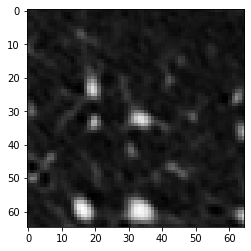

[-213.91 -212.09   76.68]
[124.71666997 154.511872   363.60956897]
[[0.04857143 0.04214286 0.05857143 ... 0.055      0.06071429 0.07571429]
 [0.03071429 0.04214286 0.05071429 ... 0.07428571 0.08285714 0.11      ]
 [0.05       0.06285714 0.04928571 ... 0.13071429 0.12214286 0.12642857]
 ...
 [0.06714286 0.08642857 0.09785714 ... 0.065      0.06285714 0.06142857]
 [0.03571429 0.03214286 0.045      ... 0.05857143 0.07428571 0.07357143]
 [0.04714286 0.05928571 0.07857143 ... 0.07214286 0.09857143 0.095     ]]


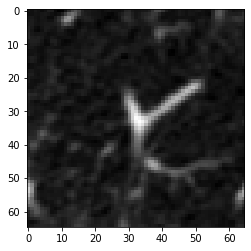

[-385.1565275   -79.27616018  -79.14688932]
[ 29.57970773 360.57455681 121.84178918]
[[0.75642857 0.74071429 0.76714286 ... 0.64071429 0.71571429 0.74142857]
 [0.74928571 0.715      0.73357143 ... 0.68642857 0.75285714 0.73214286]
 [0.78857143 0.74714286 0.73071429 ... 0.80214286 0.74285714 0.70142857]
 ...
 [0.60714286 0.61714286 0.63571429 ... 0.80714286 0.81285714 0.775     ]
 [0.59428571 0.62928571 0.65571429 ... 0.79785714 0.76857143 0.75      ]
 [0.61285714 0.64357143 0.67785714 ... 0.75785714 0.72857143 0.73785714]]


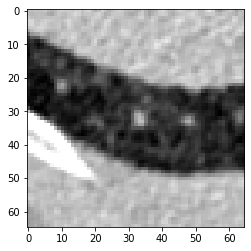

[-149.48 -132.34  -41.34]
[160.51111536 278.24520533 180.49975079]
[[0.05571429 0.04071429 0.03       ... 0.70571429 0.78285714 0.78714286]
 [0.085      0.07285714 0.045      ... 0.43214286 0.61785714 0.69071429]
 [0.10142857 0.09       0.06142857 ... 0.17071429 0.32285714 0.45428571]
 ...
 [0.07214286 0.08142857 0.07642857 ... 0.13071429 0.15       0.125     ]
 [0.04285714 0.04857143 0.07642857 ... 0.13214286 0.08857143 0.06928571]
 [0.09785714 0.075      0.07       ... 0.115      0.08071429 0.03357143]]


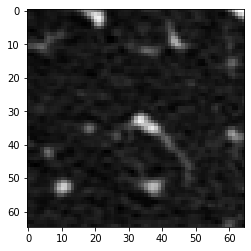

[-402.1685187   -85.28441133  -46.60463354]
[ 20.12860126 351.25266412 172.33159208]
[[0.66       0.70142857 0.72214286 ... 0.71428571 0.725      0.85357143]
 [0.69285714 0.725      0.72928571 ... 0.67428571 0.68642857 0.83857143]
 [0.77       0.82071429 0.805      ... 0.77714286 0.73785714 0.77142857]
 ...
 [0.79857143 0.83642857 0.90714286 ... 0.73       0.68428571 0.79785714]
 [0.775      0.73285714 0.71928571 ... 0.79857143 0.74071429 0.79428571]
 [0.67357143 0.64928571 0.65857143 ... 0.75928571 0.74928571 0.79071429]]


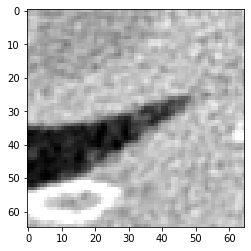

[-212.44 -206.68  101.27]
[125.53333666 162.90556897 401.76132655]
[[0.13428571 0.18928571 0.17714286 ... 0.70357143 0.71928571 0.74142857]
 [0.08285714 0.11214286 0.10428571 ... 0.70214286 0.69285714 0.71428571]
 [0.06428571 0.06928571 0.05       ... 0.70357143 0.67142857 0.66428571]
 ...
 [0.08285714 0.08       0.05285714 ... 0.075      0.06       0.05714286]
 [0.04928571 0.05357143 0.03714286 ... 0.075      0.06285714 0.06357143]
 [0.02785714 0.02571429 0.02785714 ... 0.06071429 0.05071429 0.05714286]]


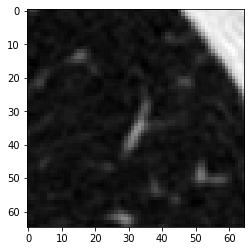

[-292.7949879  -189.0317202   -42.98679924]
[ 80.89167553 190.28714248 177.94471682]
[[0.21428571 0.225      0.29       ... 0.71928571 0.73714286 0.76785714]
 [0.20785714 0.20928571 0.25642857 ... 0.72       0.74071429 0.77142857]
 [0.21785714 0.23642857 0.26642857 ... 0.72285714 0.74142857 0.76071429]
 ...
 [0.05571429 0.045      0.06571429 ... 0.72785714 0.72642857 0.75142857]
 [0.04214286 0.05214286 0.08       ... 0.73571429 0.74642857 0.75071429]
 [0.05714286 0.07357143 0.08642857 ... 0.76714286 0.75285714 0.74214286]]


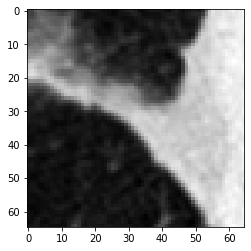

[-211.5981677 -178.7858274  -60.1990489]
[126.00102128 206.1838004  151.23965068]
[[0.04928571 0.05714286 0.045      ... 0.04857143 0.06071429 0.06142857]
 [0.07642857 0.09428571 0.07642857 ... 0.05357143 0.07285714 0.07142857]
 [0.08142857 0.09285714 0.08357143 ... 0.06714286 0.07857143 0.07214286]
 ...
 [0.09142857 0.08857143 0.09       ... 0.07642857 0.08       0.07      ]
 [0.08214286 0.07071429 0.07642857 ... 0.09714286 0.09785714 0.09857143]
 [0.07785714 0.04714286 0.04785714 ... 0.15857143 0.145      0.14714286]]


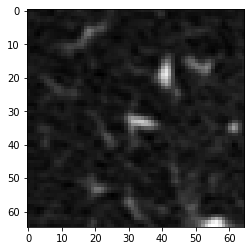

[-308.8010271 -111.2417996  140.8895053]
[ 71.9994313  310.97938292 463.23158931]
[[0.12857143 0.11142857 0.07428571 ... 1.         0.92857143 0.73714286]
 [0.13071429 0.08928571 0.04785714 ... 1.         0.93214286 0.72928571]
 [0.09571429 0.05071429 0.04142857 ... 1.         0.89571429 0.71142857]
 ...
 [0.145      0.14285714 0.13928571 ... 0.62928571 0.61785714 0.62285714]
 [0.13428571 0.13642857 0.15071429 ... 0.63285714 0.63785714 0.65142857]
 [0.10857143 0.13357143 0.15285714 ... 0.61357143 0.63357143 0.68      ]]


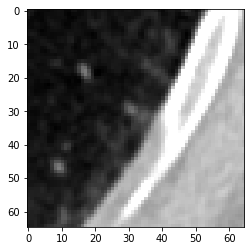

[-264.84 -214.28  -42.06]
[ 96.42222478 151.11405382 179.38265988]
[[0.02142857 0.04785714 0.06       ... 0.62428571 0.67142857 0.68142857]
 [0.04071429 0.07357143 0.06642857 ... 0.63928571 0.645      0.65642857]
 [0.05642857 0.095      0.08142857 ... 0.65785714 0.63142857 0.64571429]
 ...
 [0.02714286 0.02071429 0.03285714 ... 0.735      0.72714286 0.75142857]
 [0.06357143 0.04       0.04142857 ... 0.74857143 0.74571429 0.75571429]
 [0.09       0.06928571 0.06142857 ... 0.78       0.76357143 0.72785714]]


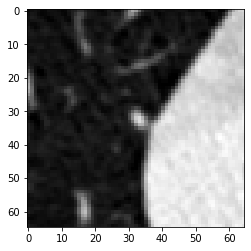

[-215.66 -165.94   65.12]
[123.74444772 226.11429624 345.67405382]
[[0.04571429 0.05071429 0.06071429 ... 0.05571429 0.055      0.05571429]
 [0.07214286 0.07214286 0.08571429 ... 0.04571429 0.04214286 0.05      ]
 [0.06071429 0.05071429 0.06928571 ... 0.07928571 0.075      0.08      ]
 ...
 [0.75071429 0.76357143 0.75785714 ... 0.05357143 0.06714286 0.07142857]
 [0.73071429 0.75928571 0.76428571 ... 0.06714286 0.08142857 0.08571429]
 [0.72857143 0.74285714 0.76       ... 0.08642857 0.07857143 0.055     ]]


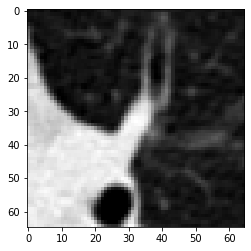

[-309.11 -109.18  -53.97]
[ 71.82777968 314.17829624 160.90411442]
[[0.05       0.04214286 0.08214286 ... 0.10357143 0.08285714 0.05142857]
 [0.02857143 0.02       0.07857143 ... 0.11857143 0.07714286 0.04142857]
 [0.02285714 0.02357143 0.07714286 ... 0.10857143 0.08071429 0.04642857]
 ...
 [0.06428571 0.065      0.08785714 ... 0.09       0.07714286 0.06357143]
 [0.07857143 0.06714286 0.08571429 ... 0.09214286 0.09285714 0.08285714]
 [0.07714286 0.07642857 0.09428571 ... 0.09357143 0.06928571 0.06857143]]


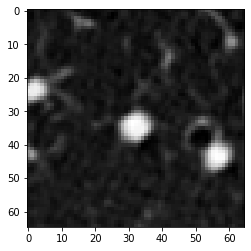

[-312.78 -113.49  -30.68]
[ 69.78889074 307.49126594 197.0389023 ]
[[0.06928571 0.07928571 0.08857143 ... 0.09785714 0.06       0.03785714]
 [0.09142857 0.07214286 0.065      ... 0.10857143 0.08642857 0.03785714]
 [0.07142857 0.03785714 0.03571429 ... 0.075      0.08285714 0.05142857]
 ...
 [0.07785714 0.05428571 0.05071429 ... 0.555      0.63       0.67571429]
 [0.08357143 0.07785714 0.09357143 ... 0.57928571 0.65428571 0.7       ]
 [0.08357143 0.12714286 0.14285714 ... 0.60357143 0.65       0.67642857]]


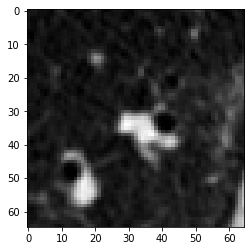

[-314.7100002  -138.2723025    45.70637421]
[ 68.71666838 269.04114812 315.55351926]
[[0.74642857 0.77142857 0.77285714 ... 0.11642857 0.07357143 0.04357143]
 [0.74428571 0.77142857 0.76071429 ... 0.12357143 0.1        0.05142857]
 [0.72       0.74357143 0.75       ... 0.11571429 0.11642857 0.06928571]
 ...
 [0.73571429 0.77642857 0.77785714 ... 0.19571429 0.13642857 0.12571429]
 [0.76642857 0.78928571 0.77142857 ... 0.20571429 0.06142857 0.        ]
 [0.77357143 0.79857143 0.78928571 ... 0.19642857 0.06       0.        ]]


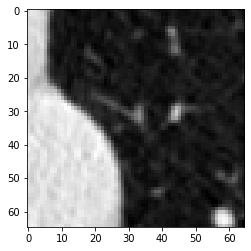

[-394.83  -78.36  -77.8 ]
[ 24.2055562  361.99599321 123.93150836]
[[0.82214286 0.83285714 0.755      ... 0.70428571 0.68       0.66428571]
 [0.80428571 0.76142857 0.73285714 ... 0.71571429 0.675      0.645     ]
 [0.71285714 0.70071429 0.76357143 ... 0.68       0.64785714 0.61214286]
 ...
 [0.70928571 0.56642857 0.52       ... 0.68714286 0.69       0.73714286]
 [0.52071429 0.45142857 0.51071429 ... 0.83       0.80785714 0.76142857]
 [0.47642857 0.51       0.61142857 ... 0.91571429 0.88714286 0.79928571]]


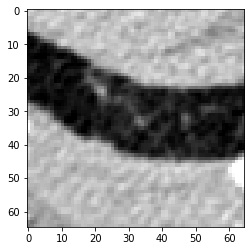

[-296.2  -196.27  -91.5 ]
[ 79.00000209 179.0568417  102.67575079]
[[0.06214286 0.10642857 0.13571429 ... 0.065      0.06214286 0.08428571]
 [0.04714286 0.07428571 0.10071429 ... 0.08357143 0.09785714 0.10928571]
 [0.04571429 0.05       0.06428571 ... 0.08714286 0.11142857 0.11071429]
 ...
 [0.05571429 0.04428571 0.01357143 ... 0.08142857 0.09428571 0.07214286]
 [0.035      0.03857143 0.02571429 ... 0.13357143 0.15142857 0.09857143]
 [0.03785714 0.04357143 0.04428571 ... 0.14       0.15142857 0.115     ]]


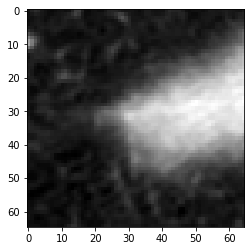

[-240.2  -114.21 -101.14]
[110.11111403 306.37417503  87.71914473]
[[0.11357143 0.09714286 0.07714286 ... 0.07357143 0.06714286 0.06857143]
 [0.11285714 0.10142857 0.06714286 ... 0.06571429 0.05928571 0.06857143]
 [0.08642857 0.09285714 0.06214286 ... 0.07142857 0.07428571 0.07642857]
 ...
 [1.         0.96642857 0.86285714 ... 0.05642857 0.05142857 0.06571429]
 [1.         1.         0.89857143 ... 0.06642857 0.07071429 0.08285714]
 [1.         1.         0.90571429 ... 0.10714286 0.06857143 0.04357143]]


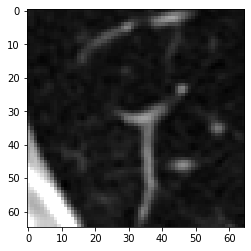

[-286.62  -95.87 -105.82]
[ 84.32222446 334.82896291  80.45805382]
[[1.         0.78       0.39142857 ... 0.07285714 0.09714286 0.10785714]
 [1.         0.83214286 0.46428571 ... 0.06571429 0.08785714 0.09428571]
 [1.         0.85785714 0.52071429 ... 0.03714286 0.03142857 0.04785714]
 ...
 [0.735      0.74214286 0.73428571 ... 0.06357143 0.07357143 0.08928571]
 [0.72142857 0.725      0.72285714 ... 0.08357143 0.075      0.10571429]
 [0.71928571 0.72571429 0.73214286 ... 0.12428571 0.10285714 0.13      ]]


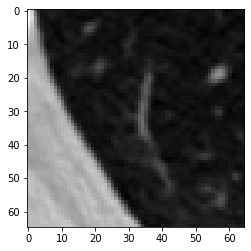

[-299.2  -212.18  -90.18]
[ 77.33333538 154.37223564 104.72375079]
[[0.03571429 0.00285714 0.02928571 ... 0.015      0.03785714 0.06285714]
 [0.03571429 0.03714286 0.04285714 ... 0.01714286 0.03642857 0.06857143]
 [0.02928571 0.03       0.03357143 ... 0.03785714 0.04785714 0.08      ]
 ...
 [0.06785714 0.09357143 0.06714286 ... 0.725      0.73785714 0.74      ]
 [0.10357143 0.08928571 0.05214286 ... 0.70214286 0.73285714 0.74642857]
 [0.10714286 0.09928571 0.07571429 ... 0.71214286 0.73071429 0.74214286]]


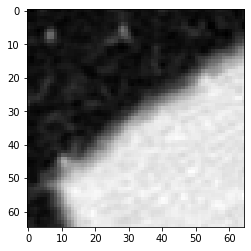

[-286.58 -174.18  -30.18]
[ 84.34444668 213.32981139 197.81465988]
[[0.08428571 0.08357143 0.10071429 ... 0.74214286 0.74785714 0.73214286]
 [0.08214286 0.06428571 0.08071429 ... 0.74428571 0.74785714 0.75357143]
 [0.06785714 0.05642857 0.055      ... 0.75142857 0.75142857 0.76642857]
 ...
 [0.07571429 0.07071429 0.08357143 ... 0.06357143 0.06642857 0.06428571]
 [0.10785714 0.09428571 0.08428571 ... 0.04071429 0.04785714 0.05785714]
 [0.09428571 0.09857143 0.07214286 ... 0.03357143 0.04357143 0.06142857]]


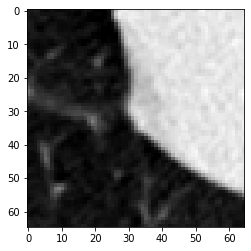

[-326.67 -179.25 -133.85]
[ 62.07222387 205.46362958  36.96908412]
[[0.65071429 0.64       0.61285714 ... 0.715      0.71785714 0.745     ]
 [0.63642857 0.62571429 0.59857143 ... 0.75214286 0.71642857 0.74      ]
 [0.62       0.60428571 0.58857143 ... 0.76       0.72857143 0.74142857]
 ...
 [0.74857143 0.79642857 0.81428571 ... 0.83       0.81428571 0.735     ]
 [0.76       0.75857143 0.74857143 ... 0.82357143 0.78       0.70857143]
 [0.72571429 0.70642857 0.69928571 ... 0.775      0.74642857 0.71571429]]


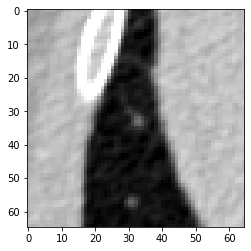

[-351.6097224   -96.20864838  129.1410368 ]
[ 48.21682217 334.30354482 445.00366243]
[[4.28571429e-02 6.57142857e-02 9.00000000e-02 ... 1.00000000e+00
  1.00000000e+00 9.07857143e-01]
 [6.42857143e-03 2.35714286e-02 3.57142857e-02 ... 1.00000000e+00
  9.37857143e-01 8.43571429e-01]
 [1.00000000e-02 3.57142857e-03 7.14285714e-04 ... 9.60714286e-01
  8.15000000e-01 7.99285714e-01]
 ...
 [1.91428571e-01 2.12857143e-01 2.40000000e-01 ... 6.20714286e-01
  5.54285714e-01 5.87142857e-01]
 [2.21428571e-01 2.88571429e-01 3.56428571e-01 ... 6.60714286e-01
  6.19285714e-01 6.54285714e-01]
 [3.47142857e-01 4.58571429e-01 5.51428571e-01 ... 6.73571429e-01
  6.79285714e-01 7.19285714e-01]]


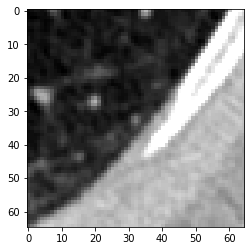

[-250.62  -122.56   -23.695]
[104.32222499 293.41902352 207.87623564]
[[0.57       0.76214286 0.76428571 ... 0.745      0.76857143 0.77071429]
 [0.62571429 0.765      0.75714286 ... 0.75928571 0.75428571 0.77714286]
 [0.67285714 0.77428571 0.77071429 ... 0.77428571 0.73928571 0.75857143]
 ...
 [0.05071429 0.06142857 0.03642857 ... 0.05714286 0.06857143 0.11285714]
 [0.06285714 0.06428571 0.02857143 ... 0.07785714 0.05428571 0.06071429]
 [0.07714286 0.07571429 0.06571429 ... 0.08142857 0.07142857 0.06571429]]


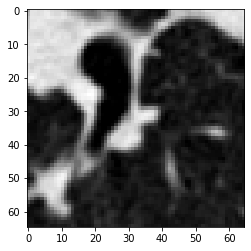

[-197.7932838   -71.96583753  -53.39219574]
[133.67040143 371.91663317 161.80058649]
[[0.07214286 0.07785714 0.08142857 ... 0.05714286 0.04714286 0.05714286]
 [0.07285714 0.10214286 0.115      ... 0.04928571 0.04214286 0.05142857]
 [0.10142857 0.11857143 0.11714286 ... 0.07857143 0.05714286 0.05642857]
 ...
 [0.73285714 0.72       0.72785714 ... 1.         1.         1.        ]
 [0.73       0.71642857 0.69357143 ... 1.         0.97214286 0.94142857]
 [0.74214286 0.75428571 0.73214286 ... 0.93714286 0.95357143 0.93857143]]


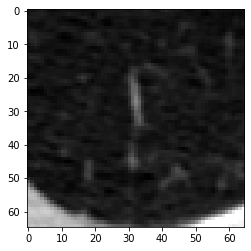

[-221.28 -155.43   97.35]
[120.62222542 242.42072048 395.67938715]
[[0.03357143 0.04642857 0.19642857 ... 0.06285714 0.07071429 0.05428571]
 [0.07       0.17642857 0.405      ... 0.06214286 0.07285714 0.08071429]
 [0.13571429 0.325      0.53642857 ... 0.04785714 0.04285714 0.06285714]
 ...
 [0.08857143 0.06571429 0.06785714 ... 0.05285714 0.07642857 0.05857143]
 [0.06642857 0.05071429 0.05       ... 0.04857143 0.06428571 0.05928571]
 [0.07785714 0.05642857 0.06071429 ... 0.03       0.02571429 0.01285714]]


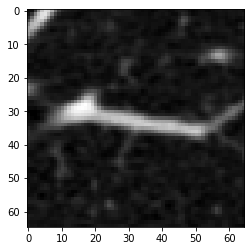

[-317.6906454   -80.87942925  -34.05130021]
[ 67.06075433 358.08706056 191.80827895]
[[0.13142857 0.10571429 0.10071429 ... 0.29214286 0.11285714 0.065     ]
 [0.11214286 0.10071429 0.09785714 ... 0.28142857 0.13214286 0.05928571]
 [0.075      0.085      0.09857143 ... 0.18214286 0.14785714 0.09357143]
 ...
 [0.27357143 0.24857143 0.23       ... 0.73       0.73571429 0.72      ]
 [0.39214286 0.315      0.23785714 ... 0.75357143 0.75571429 0.74642857]
 [0.42714286 0.35928571 0.27285714 ... 0.74642857 0.72571429 0.73142857]]


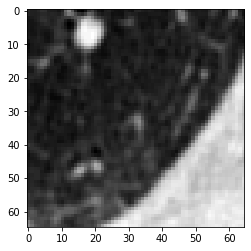

[-163.67 -127.4    87.54]
[152.62778182 285.90969018 380.45902352]
[[0.05214286 0.075      0.06857143 ... 0.03428571 0.05428571 0.05928571]
 [0.04       0.06285714 0.07428571 ... 0.02142857 0.05428571 0.06714286]
 [0.03571429 0.05857143 0.07428571 ... 0.05571429 0.06428571 0.06928571]
 ...
 [0.09071429 0.07928571 0.07714286 ... 0.06928571 0.11785714 0.17214286]
 [0.12285714 0.10714286 0.09       ... 0.08642857 0.10928571 0.10214286]
 [0.15642857 0.165      0.13428571 ... 0.11285714 0.11142857 0.09857143]]


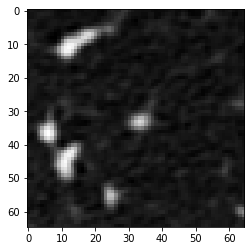

[-229.3779414   -72.61006492  -54.23600609]
[116.12336897 370.91710461 160.49140195]
[[0.08357143 0.065      0.065      ... 0.08857143 0.10071429 0.11642857]
 [0.055      0.05428571 0.07142857 ... 0.08714286 0.09714286 0.11      ]
 [0.03285714 0.06571429 0.10642857 ... 0.06642857 0.09214286 0.11142857]
 ...
 [1.         1.         1.         ... 0.40857143 0.47142857 0.53714286]
 [1.         1.         1.         ... 0.58571429 0.61071429 0.62142857]
 [1.         1.         1.         ... 0.67714286 0.68357143 0.675     ]]


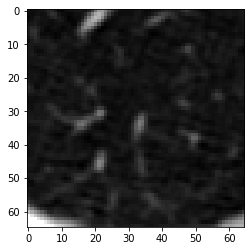

[-187.4014355  -197.1575288   -53.32911901]
[139.44365064 177.67982732 161.89845099]
[[0.01071429 0.01       0.04214286 ... 0.04       0.04785714 0.04785714]
 [0.00428571 0.02928571 0.06214286 ... 0.04785714 0.055      0.05857143]
 [0.04       0.06142857 0.07214286 ... 0.04785714 0.06857143 0.1       ]
 ...
 [0.07714286 0.05285714 0.06857143 ... 0.08642857 0.075      0.06571429]
 [0.11214286 0.08071429 0.09142857 ... 0.10071429 0.10357143 0.07928571]
 [0.14857143 0.1        0.09       ... 0.09357143 0.105      0.08357143]]


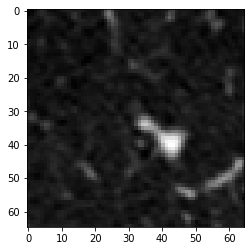

[-168.56 -163.41  113.23]
[149.91111508 230.03962958 420.31744776]
[[0.05214286 0.05142857 0.04571429 ... 0.73785714 0.74357143 0.735     ]
 [0.09       0.07428571 0.055      ... 0.75642857 0.74928571 0.75      ]
 [0.08357143 0.06428571 0.04928571 ... 0.72428571 0.72214286 0.75642857]
 ...
 [0.055      0.05071429 0.06142857 ... 0.03928571 0.04       0.01214286]
 [0.06428571 0.075      0.08428571 ... 0.05642857 0.06357143 0.04      ]
 [0.07       0.06571429 0.07214286 ... 0.03785714 0.03714286 0.04214286]]


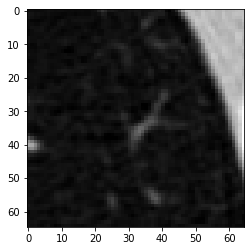

[-296.4331861   -67.96268077   91.43268211]
[ 78.87045426 378.12759153 386.49857879]
[[0.06285714 0.08928571 0.11785714 ... 0.12928571 0.14       0.13428571]
 [0.06785714 0.11571429 0.15571429 ... 0.13428571 0.14642857 0.13571429]
 [0.08214286 0.12285714 0.13857143 ... 0.14642857 0.12714286 0.10357143]
 ...
 [0.74285714 0.72714286 0.70428571 ... 0.63214286 0.62785714 0.64      ]
 [0.76785714 0.76785714 0.76357143 ... 0.62285714 0.61142857 0.635     ]
 [0.79857143 0.80142857 0.8        ... 0.635      0.61857143 0.63857143]]


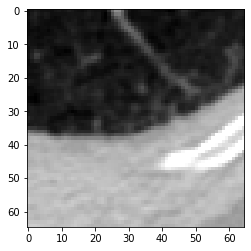

[-203.5800862  -116.9306411   -25.21552173]
[130.45551112 302.15305914 205.51712313]
[[0.08214286 0.09071429 0.12071429 ... 0.015      0.01285714 0.        ]
 [0.16785714 0.26071429 0.30571429 ... 0.         0.         0.        ]
 [0.21071429 0.35642857 0.37857143 ... 0.         0.         0.00428571]
 ...
 [0.05714286 0.06357143 0.07357143 ... 0.10714286 0.14571429 0.16571429]
 [0.025      0.03642857 0.06357143 ... 0.05571429 0.10857143 0.13428571]
 [0.07642857 0.07285714 0.08714286 ... 0.04571429 0.09714286 0.14357143]]


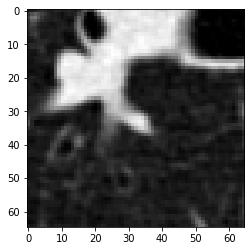

[-249.267778    -74.78830022  -98.12822244]
[105.07345945 367.53753954  92.39196324]
[[0.71785714 0.70214286 0.67571429 ... 0.04714286 0.05714286 0.07285714]
 [0.71642857 0.71       0.68571429 ... 0.05714286 0.04714286 0.04071429]
 [0.73857143 0.73357143 0.69357143 ... 0.06571429 0.04857143 0.02142857]
 ...
 [0.70642857 0.72785714 0.73571429 ... 0.71428571 0.69071429 0.67357143]
 [0.68071429 0.68642857 0.68857143 ... 0.76428571 0.75785714 0.74214286]
 [0.70571429 0.67       0.64714286 ... 0.75       0.76357143 0.74928571]]


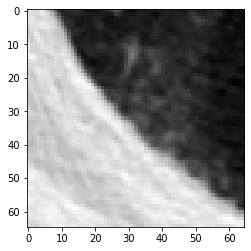

[-309.3265626  -254.2109584   -64.49449172]
[ 71.70746712  89.16056685 144.57520606]
[[0.81571429 0.82785714 0.79571429 ... 0.71214286 0.74142857 0.78285714]
 [0.78785714 0.76857143 0.74714286 ... 0.70642857 0.72428571 0.765     ]
 [0.74       0.74714286 0.74428571 ... 0.72428571 0.72714286 0.75714286]
 ...
 [0.73285714 0.71428571 0.73928571 ... 0.69142857 0.71071429 0.725     ]
 [0.71571429 0.71214286 0.72714286 ... 0.71285714 0.72428571 0.74      ]
 [0.74       0.75785714 0.75571429 ... 0.75       0.75571429 0.73      ]]


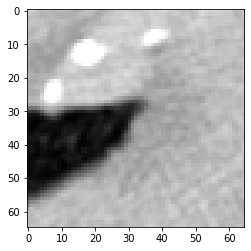

[-258.4201782  -139.9436634    53.76764346]
[ 99.98879254 266.44800636 328.06070064]
[[0.72642857 0.70071429 0.69214286 ... 0.17642857 0.14428571 0.11714286]
 [0.745      0.70642857 0.70714286 ... 0.15785714 0.165      0.12214286]
 [0.74642857 0.75428571 0.73428571 ... 0.15       0.145      0.10285714]
 ...
 [0.72214286 0.67071429 0.68571429 ... 0.07071429 0.08857143 0.11642857]
 [0.69571429 0.63142857 0.65071429 ... 0.07214286 0.05214286 0.06642857]
 [0.67071429 0.595      0.63       ... 0.08214286 0.07071429 0.06428571]]


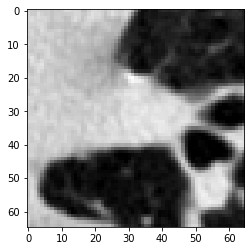

[-242.36 -171.54  -48.37]
[108.911114   217.42581139 169.59259927]
[[0.05642857 0.07071429 0.05       ... 0.73857143 0.69       0.70571429]
 [0.03714286 0.05642857 0.06571429 ... 0.72785714 0.68857143 0.70357143]
 [0.045      0.04928571 0.08       ... 0.75       0.73285714 0.74642857]
 ...
 [0.09071429 0.01642857 0.00785714 ... 0.75       0.72       0.74857143]
 [0.05071429 0.03       0.05285714 ... 0.75214286 0.74928571 0.74357143]
 [0.05       0.05928571 0.065      ... 0.75071429 0.775      0.75857143]]


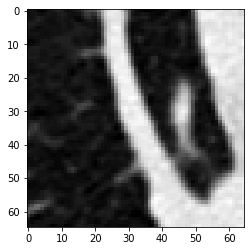

[-222.03  -70.76   87.49]
[120.20555874 373.78750836 380.38144776]
[[0.07857143 0.065      0.08714286 ... 0.04785714 0.05857143 0.05571429]
 [0.12357143 0.11071429 0.12785714 ... 0.05142857 0.05571429 0.05      ]
 [0.20142857 0.14714286 0.11       ... 0.05357143 0.04571429 0.03785714]
 ...
 [1.         1.         1.         ... 1.         0.82214286 0.7       ]
 [1.         1.         1.         ... 0.73142857 0.65928571 0.62071429]
 [1.         1.         1.         ... 0.61642857 0.60071429 0.60071429]]


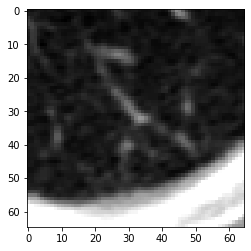

[-219.8066668   -85.35405749  -48.82935381]
[121.44074388 351.14460705 168.87990488]
[[0.07357143 0.11857143 0.19785714 ... 0.075      0.05928571 0.06714286]
 [0.11785714 0.17214286 0.22071429 ... 0.05071429 0.06714286 0.07714286]
 [0.14357143 0.21071429 0.24857143 ... 0.04714286 0.06714286 0.07357143]
 ...
 [0.05071429 0.07285714 0.07214286 ... 0.09785714 0.10285714 0.07928571]
 [0.08928571 0.08357143 0.07214286 ... 0.12928571 0.14857143 0.12714286]
 [0.11571429 0.09071429 0.07214286 ... 0.15214286 0.17285714 0.15642857]]


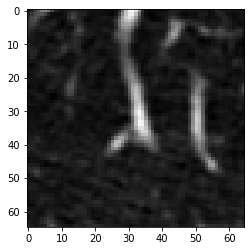

[-307.2980771 -138.6306925 -118.9051348]
[ 72.83440354 268.48510061  60.15626892]
[[1.         0.67142857 0.22428571 ... 0.07357143 0.05642857 0.09071429]
 [1.         0.65642857 0.18928571 ... 0.08428571 0.08142857 0.09714286]
 [1.         0.58071429 0.14714286 ... 0.10357143 0.10428571 0.09785714]
 ...
 [0.71928571 0.75214286 0.72285714 ... 0.09785714 0.08214286 0.06785714]
 [0.72       0.72857143 0.70357143 ... 0.06785714 0.07214286 0.07428571]
 [0.73285714 0.70142857 0.71       ... 0.06142857 0.08642857 0.09285714]]


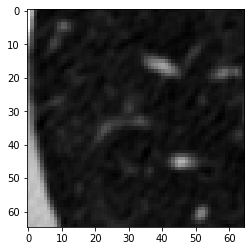

[-223.58  -235.525   27.9  ]
[119.34444761 118.15211442 287.92665988]
[[1.         1.         1.         ... 0.09142857 0.04785714 0.03      ]
 [0.865      0.83071429 0.82       ... 0.06285714 0.04571429 0.05071429]
 [0.71428571 0.69928571 0.68571429 ... 0.07       0.06142857 0.07142857]
 ...
 [0.74785714 0.74428571 0.73428571 ... 0.         0.         0.03857143]
 [0.75071429 0.725      0.73928571 ... 0.         0.         0.01428571]
 [0.74285714 0.735      0.76285714 ... 0.         0.         0.        ]]


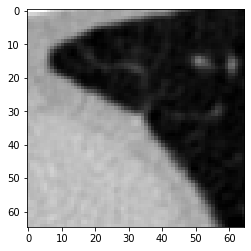

[-269.9162592  -140.3993086   -13.27045692]
[ 93.6020807  265.74106593 224.05007217]
[[0.13357143 0.08357143 0.04357143 ... 0.72142857 0.76       0.78571429]
 [0.15714286 0.10785714 0.07285714 ... 0.71928571 0.76214286 0.78285714]
 [0.18357143 0.115      0.07285714 ... 0.71642857 0.75428571 0.77571429]
 ...
 [0.11714286 0.08428571 0.06357143 ... 0.07       0.07928571 0.10142857]
 [0.07285714 0.06857143 0.05285714 ... 0.07785714 0.07285714 0.10214286]
 [0.04857143 0.05357143 0.05285714 ... 0.08857143 0.06428571 0.09357143]]


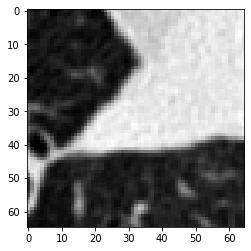

[-364.055  -86.42   114.445]
[ 41.30277887 349.49078109 422.20253867]
[[0.215      0.16714286 0.14642857 ... 0.17428571 0.15214286 0.175     ]
 [0.12071429 0.09785714 0.145      ... 0.19285714 0.26642857 0.29857143]
 [0.04142857 0.05071429 0.12214286 ... 0.16928571 0.30285714 0.37428571]
 ...
 [0.95857143 1.         1.         ... 0.70071429 0.675      0.68785714]
 [1.         1.         1.         ... 0.63857143 0.62928571 0.66071429]
 [1.         1.         1.         ... 0.61285714 0.60928571 0.62285714]]


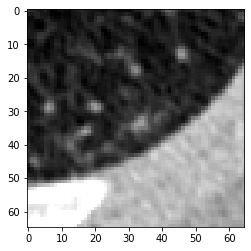

[-317.38 -171.59   76.87]
[ 67.23333511 217.34823564 363.90435685]
[[0.49785714 0.52714286 0.47642857 ... 0.00785714 0.02571429 0.05142857]
 [0.40785714 0.44285714 0.39285714 ... 0.00214286 0.00428571 0.00857143]
 [0.30571429 0.33642857 0.32214286 ... 0.03357143 0.03285714 0.02071429]
 ...
 [0.105      0.08428571 0.09642857 ... 0.15071429 0.22428571 0.26857143]
 [0.14785714 0.10142857 0.08571429 ... 0.16142857 0.30142857 0.43      ]
 [0.14142857 0.105      0.09285714 ... 0.16642857 0.305      0.44285714]]


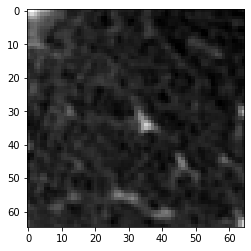

[-241.07 -139.02  -43.55]
[109.62778068 267.88108412 177.0709023 ]
[[0.05857143 0.04285714 0.03857143 ... 0.75142857 0.73142857 0.76785714]
 [0.075      0.06071429 0.04642857 ... 0.74857143 0.74214286 0.75857143]
 [0.04714286 0.04571429 0.04285714 ... 0.74714286 0.75       0.72928571]
 ...
 [0.07285714 0.06571429 0.09142857 ... 0.06285714 0.06428571 0.08357143]
 [0.08       0.04857143 0.06071429 ... 0.06285714 0.07928571 0.12      ]
 [0.085      0.04       0.01142857 ... 0.10071429 0.11285714 0.14428571]]


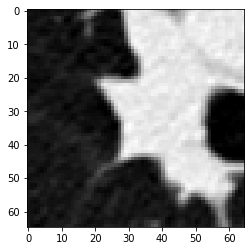

[-259.3   -64.28  -61.58]
[ 99.50000264 383.84132655 149.09708412]
[[0.09       0.09714286 0.095      ... 0.27       0.22357143 0.14071429]
 [0.08428571 0.09642857 0.11285714 ... 0.20214286 0.17285714 0.12571429]
 [0.06357143 0.08071429 0.10928571 ... 0.14928571 0.12142857 0.09928571]
 ...
 [0.71642857 0.78642857 0.92714286 ... 0.81285714 0.81571429 0.80428571]
 [0.72785714 0.70571429 0.72642857 ... 0.74       0.73857143 0.73428571]
 [0.75       0.73642857 0.71071429 ... 0.68428571 0.70214286 0.69214286]]


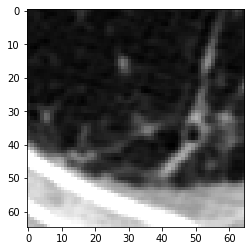

[-337.23 -108.37   66.39]
[ 56.20555704 315.43502352 347.64447806]
[[0.07       0.085      0.08142857 ... 0.04285714 0.05214286 0.03357143]
 [0.03785714 0.01642857 0.06357143 ... 0.03285714 0.06571429 0.07714286]
 [0.04285714 0.00785714 0.04857143 ... 0.04785714 0.06       0.08785714]
 ...
 [0.40714286 0.20928571 0.13857143 ... 0.13642857 0.14428571 0.11357143]
 [0.53571429 0.30428571 0.185      ... 0.15714286 0.18285714 0.17071429]
 [0.60928571 0.41714286 0.25714286 ... 0.23214286 0.32642857 0.33857143]]


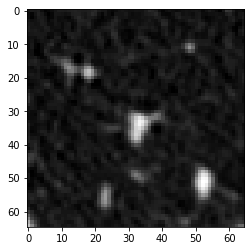

[-170.3  -189.58   59.72]
[148.94444839 189.43647806 337.295872  ]
[[0.05214286 0.03142857 0.05357143 ... 0.01857143 0.04857143 0.085     ]
 [0.05785714 0.06428571 0.08714286 ... 0.04357143 0.08714286 0.15928571]
 [0.11285714 0.16285714 0.17214286 ... 0.08285714 0.11428571 0.17714286]
 ...
 [0.14571429 0.13142857 0.08571429 ... 0.05928571 0.04928571 0.05285714]
 [0.19785714 0.18071429 0.13571429 ... 0.12       0.08857143 0.08428571]
 [0.16928571 0.13428571 0.09642857 ... 0.20214286 0.13       0.09642857]]


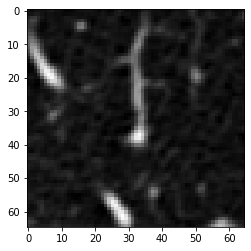

[-178.42  -80.46  -32.25]
[144.43333716 358.73781139 194.60302352]
[[0.08428571 0.08071429 0.08142857 ... 0.07071429 0.05714286 0.07357143]
 [0.11071429 0.09214286 0.09857143 ... 0.065      0.05571429 0.07714286]
 [0.06142857 0.06357143 0.06928571 ... 0.07       0.08142857 0.08642857]
 ...
 [0.11071429 0.08571429 0.08142857 ... 0.94571429 0.91857143 0.85785714]
 [0.13214286 0.10285714 0.08142857 ... 0.93857143 0.88285714 0.82357143]
 [0.16428571 0.15       0.14571429 ... 0.87285714 0.84785714 0.83785714]]


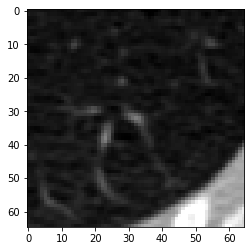

[-239.55 -248.61  -16.14]
[110.47222515  97.85053867 219.59793261]
[[1.         1.         1.         ... 0.70642857 0.68285714 0.66571429]
 [0.915      0.93428571 0.93571429 ... 0.72357143 0.70071429 0.71      ]
 [0.81214286 0.81428571 0.805      ... 0.87071429 0.865      0.90357143]
 ...
 [0.08       0.13642857 0.15928571 ... 0.69214286 0.73142857 0.74928571]
 [0.08285714 0.11857143 0.10571429 ... 0.71714286 0.72928571 0.75857143]
 [0.09428571 0.12142857 0.1        ... 0.74071429 0.725      0.77214286]]


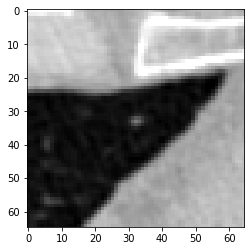

[-186.38  -85.68  -56.22]
[140.01111482 350.6389023  157.41320533]
[[0.09285714 0.06071429 0.04857143 ... 0.05785714 0.05071429 0.07928571]
 [0.09428571 0.07571429 0.06642857 ... 0.07357143 0.06142857 0.07285714]
 [0.06071429 0.05071429 0.06285714 ... 0.05428571 0.03857143 0.03714286]
 ...
 [0.065      0.02142857 0.02214286 ... 0.15428571 0.11357143 0.07285714]
 [0.18857143 0.07142857 0.005      ... 0.16214286 0.145      0.11428571]
 [0.42214286 0.22785714 0.09428571 ... 0.105      0.12571429 0.12357143]]


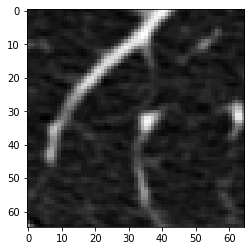

[-154.76 -109.93   77.76]
[157.57778195 313.01465988 365.28520533]
[[0.1        0.08571429 0.14214286 ... 0.13428571 0.085      0.065     ]
 [0.14785714 0.14357143 0.18142857 ... 0.11928571 0.05285714 0.03357143]
 [0.17       0.15142857 0.14071429 ... 0.05214286 0.01       0.01214286]
 ...
 [0.06928571 0.07       0.065      ... 0.04785714 0.05857143 0.06      ]
 [0.06785714 0.08642857 0.08428571 ... 0.08857143 0.1        0.09428571]
 [0.07357143 0.07642857 0.07214286 ... 0.08       0.08642857 0.08714286]]


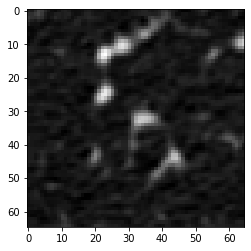

[-214.2833335 -154.5950002  121.2494442]
[124.50926247 243.71623533 432.75973694]
[[0.46571429 0.58071429 0.54071429 ... 0.57428571 0.70857143 0.73428571]
 [0.60571429 0.58928571 0.42285714 ... 0.53285714 0.70428571 0.71857143]
 [0.62214286 0.47785714 0.25642857 ... 0.46928571 0.68285714 0.71785714]
 ...
 [0.11785714 0.09642857 0.06071429 ... 0.08642857 0.225      0.55      ]
 [0.08928571 0.08357143 0.06357143 ... 0.11       0.25571429 0.52714286]
 [0.09214286 0.09428571 0.07357143 ... 0.11357143 0.24928571 0.49428571]]


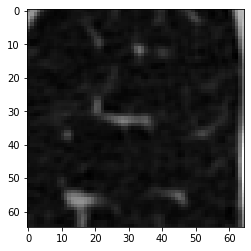

[-299.27 -116.19  128.18]
[ 77.29444649 303.30217503 443.51259927]
[[0.1        0.1        0.06357143 ... 0.05928571 0.05857143 0.05714286]
 [0.09071429 0.08       0.04428571 ... 0.06357143 0.07357143 0.07571429]
 [0.07642857 0.06785714 0.04142857 ... 0.07642857 0.09571429 0.09285714]
 ...
 [0.09571429 0.07571429 0.07142857 ... 0.68428571 0.765      0.76142857]
 [0.07642857 0.08142857 0.07785714 ... 0.74214286 0.775      0.74142857]
 [0.06428571 0.08285714 0.08142857 ... 0.74714286 0.745      0.71      ]]


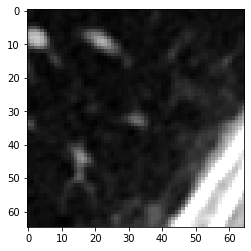

[-201.56 -229.68  -28.04]
[131.57778126 127.22072048 201.1349023 ]
[[0.74928571 0.76428571 0.77642857 ... 0.78571429 0.76785714 0.75357143]
 [0.75142857 0.75       0.74142857 ... 0.78428571 0.76357143 0.74357143]
 [0.72357143 0.71928571 0.70214286 ... 0.78142857 0.76071429 0.73285714]
 ...
 [0.06214286 0.06214286 0.05928571 ... 0.65571429 0.64857143 0.64142857]
 [0.03       0.03       0.05928571 ... 0.66285714 0.645      0.63642857]
 [0.05142857 0.02857143 0.055      ... 0.65642857 0.65       0.62857143]]


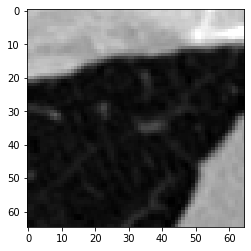

[-271.95  -62.8   -57.93]
[ 92.47222467 386.13756897 154.76011442]
[[0.14571429 0.21428571 0.28642857 ... 0.11571429 0.10571429 0.075     ]
 [0.09785714 0.13142857 0.16642857 ... 0.14642857 0.12785714 0.09785714]
 [0.06357143 0.07       0.08642857 ... 0.13714286 0.13142857 0.13214286]
 ...
 [0.685      0.67571429 0.70071429 ... 0.73785714 0.73857143 0.74142857]
 [0.69857143 0.66928571 0.65714286 ... 0.74642857 0.75214286 0.74857143]
 [0.685      0.69285714 0.69214286 ... 0.74357143 0.755      0.76714286]]


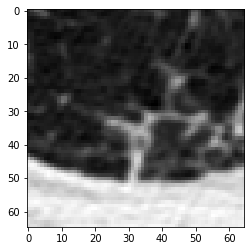

[-298.   -197.76  -99.39]
[ 78.00000207 176.74508412  90.43429624]
[[0.03571429 0.05357143 0.04142857 ... 0.07285714 0.08142857 0.09642857]
 [0.04285714 0.04285714 0.03214286 ... 0.07       0.06642857 0.07428571]
 [0.04       0.04428571 0.05142857 ... 0.05857143 0.07142857 0.10071429]
 ...
 [0.06       0.04428571 0.02142857 ... 0.08357143 0.09214286 0.08142857]
 [0.035      0.02857143 0.04571429 ... 0.08071429 0.09142857 0.08357143]
 [0.04142857 0.055      0.07714286 ... 0.08       0.11928571 0.11428571]]


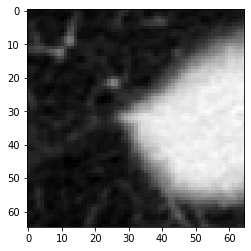

[-221.5738097   -81.08520499  -37.23796688]
[120.4589978  357.76779638 186.86411733]
[[0.135      0.07857143 0.05785714 ... 0.13571429 0.205      0.21071429]
 [0.10571429 0.07071429 0.06928571 ... 0.075      0.11571429 0.15357143]
 [0.04214286 0.04928571 0.07285714 ... 0.08785714 0.07928571 0.12857143]
 ...
 [0.09       0.08285714 0.10857143 ... 0.61       0.90928571 1.        ]
 [0.09071429 0.08714286 0.08428571 ... 0.98       1.         1.        ]
 [0.12857143 0.11428571 0.08714286 ... 1.         1.         1.        ]]


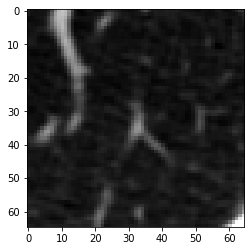

[-321.05 -169.44  130.98]
[ 65.19444617 220.68399321 447.8568417 ]
[[0.12785714 0.09642857 0.07142857 ... 0.02714286 0.02285714 0.01      ]
 [0.08928571 0.08714286 0.07357143 ... 0.05071429 0.04428571 0.02214286]
 [0.06714286 0.06642857 0.05642857 ... 0.07142857 0.07214286 0.04214286]
 ...
 [0.06357143 0.08       0.05785714 ... 0.05857143 0.04285714 0.05928571]
 [0.06714286 0.08714286 0.06642857 ... 0.08214286 0.06071429 0.06857143]
 [0.07       0.08428571 0.07928571 ... 0.09214286 0.07571429 0.07142857]]


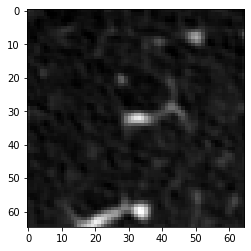

[-163.61  -120.49    73.425]
[152.66111516 296.63065988 358.55938715]
[[0.14       0.08642857 0.07071429 ... 0.06142857 0.05642857 0.05857143]
 [0.045      0.01642857 0.00571429 ... 0.05785714 0.07642857 0.06785714]
 [0.05071429 0.03071429 0.02428571 ... 0.05428571 0.08       0.05785714]
 ...
 [0.11857143 0.11571429 0.1        ... 0.07428571 0.07428571 0.07214286]
 [0.14714286 0.18285714 0.14428571 ... 0.10428571 0.11785714 0.10857143]
 [0.14142857 0.16357143 0.10214286 ... 0.12714286 0.12071429 0.115     ]]


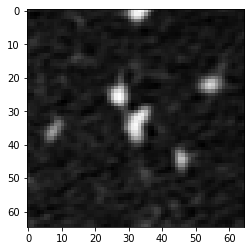

[-219.2  -240.32   45.68]
[121.777781   110.71259927 315.51259927]
[[0.64       0.63714286 0.64428571 ... 1.         1.         1.        ]
 [0.62       0.63071429 0.65071429 ... 1.         1.         1.        ]
 [0.62357143 0.64285714 0.66357143 ... 1.         1.         1.        ]
 ...
 [0.77285714 0.75785714 0.74642857 ... 0.08857143 0.09       0.06071429]
 [0.75285714 0.76       0.76285714 ... 0.07857143 0.06571429 0.05      ]
 [0.75571429 0.77142857 0.76357143 ... 0.05642857 0.05714286 0.06142857]]


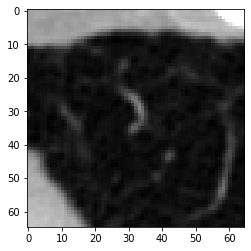

[-217.7008984 -182.614617   107.6035501]
[122.61061525 200.24337532 411.58792549]
[[0.06785714 0.05785714 0.05714286 ... 0.82428571 1.         1.        ]
 [0.06428571 0.04071429 0.04714286 ... 0.56928571 0.98071429 1.        ]
 [0.05428571 0.02785714 0.03428571 ... 0.35071429 0.71428571 1.        ]
 ...
 [0.12285714 0.12428571 0.10285714 ... 0.08       0.09071429 0.07142857]
 [0.11928571 0.11357143 0.11142857 ... 0.05857143 0.07357143 0.065     ]
 [0.13571429 0.11785714 0.135      ... 0.04285714 0.04642857 0.05714286]]


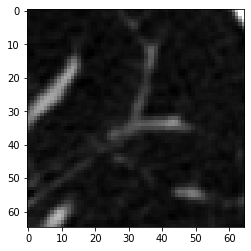

[-262.3850002   -79.06996689  -12.7713002 ]
[ 97.78611359 360.89446883 224.82452139]
[[0.13571429 0.12642857 0.13214286 ... 1.         1.         1.        ]
 [0.19357143 0.18928571 0.17       ... 1.         1.         1.        ]
 [0.16428571 0.18928571 0.18571429 ... 1.         1.         1.        ]
 ...
 [0.11714286 0.09857143 0.09928571 ... 0.79357143 0.79642857 0.76285714]
 [0.14857143 0.12214286 0.11714286 ... 0.82214286 0.79714286 0.77857143]
 [0.15428571 0.11428571 0.11857143 ... 0.84285714 0.81214286 0.82142857]]


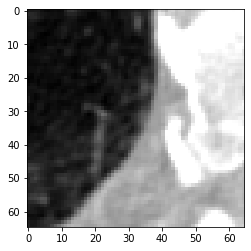

[-386.3110829   -84.23368832  -39.30896221]
[ 28.93828804 352.88287679 183.65093669]
[[0.80642857 0.75214286 0.73642857 ... 0.         0.         0.05      ]
 [0.83214286 0.81142857 0.80428571 ... 0.06214286 0.03428571 0.08142857]
 [0.79285714 0.82       0.86357143 ... 0.19214286 0.11285714 0.16214286]
 ...
 [0.78142857 0.81714286 0.80642857 ... 0.795      0.81285714 0.76357143]
 [0.77214286 0.82071429 0.79285714 ... 0.76857143 0.78785714 0.76357143]
 [0.78357143 0.825      0.79785714 ... 0.70071429 0.71       0.70285714]]


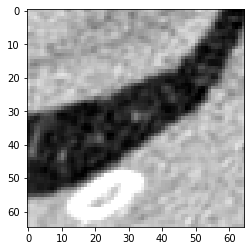

[-210.11 -103.27  -16.41]
[126.82778114 323.34775079 219.17902352]
[[0.015      0.07714286 0.14285714 ... 0.08       0.08857143 0.09142857]
 [0.07357143 0.19071429 0.23071429 ... 0.06928571 0.06928571 0.06357143]
 [0.24071429 0.35857143 0.295      ... 0.07785714 0.06       0.075     ]
 ...
 [0.06214286 0.13142857 0.21285714 ... 0.78428571 0.78571429 0.84571429]
 [0.07642857 0.11142857 0.14785714 ... 0.79857143 0.80642857 0.84071429]
 [0.11142857 0.13       0.13214286 ... 0.83071429 0.82       0.80785714]]


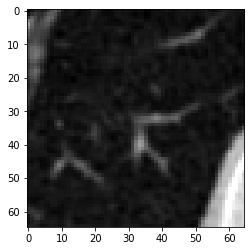

[-301.62  -248.125  -43.48 ]
[ 75.9888909   98.60302352 177.17950836]
[[0.68785714 0.75571429 0.80857143 ... 0.6        0.61642857 0.62642857]
 [0.66285714 0.70214286 0.74714286 ... 0.60642857 0.62357143 0.62214286]
 [0.73357143 0.72071429 0.73285714 ... 0.63142857 0.635      0.61714286]
 ...
 [0.72142857 0.72857143 0.73071429 ... 0.62       0.63928571 0.64214286]
 [0.77071429 0.77714286 0.75642857 ... 0.64785714 0.65285714 0.65071429]
 [0.78       0.78857143 0.76642857 ... 0.63142857 0.66       0.67428571]]


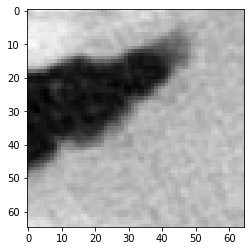

[-252.2  -141.41  135.89]
[103.44444718 264.17296291 455.47478109]
[[0.09714286 0.10428571 0.095      ... 0.76857143 0.80571429 0.83571429]
 [0.12142857 0.125      0.10857143 ... 0.77857143 0.82857143 0.87571429]
 [0.11928571 0.11642857 0.11214286 ... 0.77642857 0.82428571 0.87928571]
 ...
 [0.08928571 0.08214286 0.06428571 ... 0.68928571 0.73857143 0.76714286]
 [0.07571429 0.06214286 0.05142857 ... 0.73428571 0.76214286 0.77071429]
 [0.045      0.03642857 0.03714286 ... 0.735      0.74142857 0.75285714]]


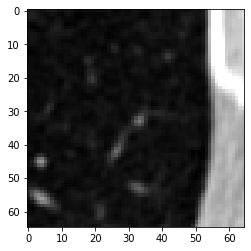

[-272.1681037  -103.8790347   -14.87130021]
[ 92.35105595 322.40282422 221.56633955]
[[0.         0.01285714 0.19571429 ... 0.10571429 0.105      0.12285714]
 [0.         0.04142857 0.24571429 ... 0.11857143 0.115      0.105     ]
 [0.01142857 0.09571429 0.34071429 ... 0.14142857 0.13428571 0.10142857]
 ...
 [0.06928571 0.04428571 0.05357143 ... 0.89785714 0.88642857 0.875     ]
 [0.07071429 0.06285714 0.075      ... 0.89214286 0.91928571 0.88857143]
 [0.09214286 0.08714286 0.09857143 ... 0.86571429 0.90214286 0.89642857]]


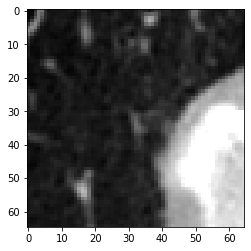

[-203.2396228   -70.80820587  103.7698947 ]
[130.64465746 373.71271623 405.63995105]
[[0.06285714 0.06214286 0.06       ... 0.11928571 0.145      0.18428571]
 [0.03       0.04142857 0.03214286 ... 0.11785714 0.14571429 0.17      ]
 [0.02357143 0.01142857 0.00142857 ... 0.115      0.13142857 0.16285714]
 ...
 [0.73571429 0.73428571 0.76928571 ... 0.64785714 0.64928571 0.64857143]
 [0.72142857 0.74857143 0.76285714 ... 0.64214286 0.64142857 0.63214286]
 [0.725      0.73       0.71571429 ... 0.66       0.63285714 0.64      ]]


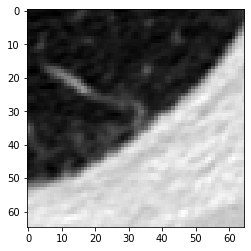

[-314.6664288  -193.4508574    51.35727122]
[ 68.74087471 183.43078416 324.32097159]
[[0.77214286 0.78285714 0.75928571 ... 0.49642857 0.49642857 0.48928571]
 [0.78714286 0.81       0.75642857 ... 0.50857143 0.49357143 0.46357143]
 [0.78428571 0.77857143 0.71714286 ... 0.53428571 0.49       0.43071429]
 ...
 [0.05857143 0.05857143 0.09       ... 0.06642857 0.03928571 0.03642857]
 [0.06214286 0.07       0.075      ... 0.07642857 0.04071429 0.03214286]
 [0.065      0.08785714 0.075      ... 0.07785714 0.06285714 0.04642857]]


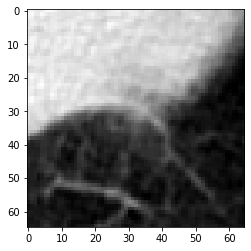

[-302.79  -86.06  107.86]
[ 75.33889088 350.04932655 411.98581139]
[[0.08785714 0.11857143 0.09714286 ... 0.09357143 0.10571429 0.11285714]
 [0.06857143 0.09214286 0.07571429 ... 0.11214286 0.10928571 0.10214286]
 [0.06571429 0.06714286 0.05571429 ... 0.11714286 0.11428571 0.10714286]
 ...
 [0.14214286 0.14357143 0.14       ... 0.75071429 0.75857143 0.75      ]
 [0.22571429 0.19857143 0.17142857 ... 0.75428571 0.76285714 0.75214286]
 [0.34214286 0.33214286 0.31928571 ... 0.73285714 0.73142857 0.72857143]]


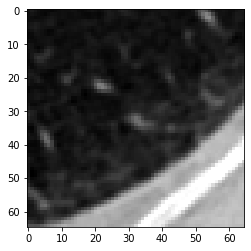

[-326.0586422   -66.98214795  -83.28405742]
[ 62.4118671  379.64890306 115.42291018]
[[0.18571429 0.13857143 0.12214286 ... 0.415      0.38571429 0.31857143]
 [0.14571429 0.12428571 0.13785714 ... 0.39642857 0.40571429 0.37785714]
 [0.14571429 0.15357143 0.16       ... 0.39714286 0.45       0.45642857]
 ...
 [0.60357143 0.60357143 0.63142857 ... 1.         1.         1.        ]
 [0.61428571 0.62928571 0.65071429 ... 1.         1.         0.98857143]
 [0.65714286 0.68071429 0.68142857 ... 0.90214286 0.86071429 0.83214286]]


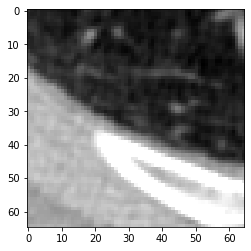

[-353.8278181   -88.77755386 -102.9990435 ]
[ 46.98454674 345.83300056  84.83481057]
[[0.115      0.04357143 0.04       ... 0.77785714 0.715      0.67285714]
 [0.08285714 0.03857143 0.06       ... 0.72785714 0.66357143 0.655     ]
 [0.11571429 0.09       0.09642857 ... 0.72071429 0.70642857 0.73785714]
 ...
 [0.67357143 0.68785714 0.645      ... 0.18142857 0.22285714 0.21785714]
 [0.66642857 0.65785714 0.615      ... 0.10571429 0.15428571 0.21071429]
 [0.66       0.64714286 0.61928571 ... 0.08928571 0.11428571 0.21      ]]


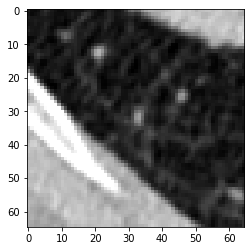

[-291.2  -226.68  -73.43]
[ 81.77777994 131.87526594 130.71162958]
[[0.77928571 0.77428571 0.78357143 ... 0.09071429 0.08357143 0.08642857]
 [0.77785714 0.77428571 0.78071429 ... 0.11785714 0.10785714 0.1       ]
 [0.79       0.78428571 0.80928571 ... 0.08214286 0.08928571 0.07928571]
 ...
 [0.04571429 0.045      0.05285714 ... 0.07142857 0.07285714 0.09428571]
 [0.05428571 0.045      0.045      ... 0.07357143 0.06071429 0.08285714]
 [0.07571429 0.07071429 0.06642857 ... 0.07142857 0.06428571 0.075     ]]


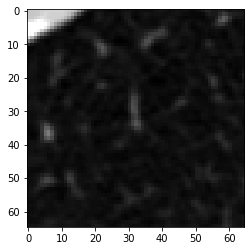

[-232.63 -128.68   28.89]
[114.3166697  283.92375079 289.46265988]
[[0.72571429 0.74857143 0.75071429 ... 0.74285714 0.73285714 0.75785714]
 [0.74571429 0.75571429 0.74857143 ... 0.77785714 0.76214286 0.765     ]
 [0.74571429 0.76714286 0.76142857 ... 0.81285714 0.79071429 0.73714286]
 ...
 [0.03       0.04857143 0.04071429 ... 0.73214286 0.74357143 0.735     ]
 [0.04714286 0.05357143 0.05285714 ... 0.735      0.75357143 0.74642857]
 [0.04928571 0.04285714 0.05785714 ... 0.71928571 0.72928571 0.73857143]]


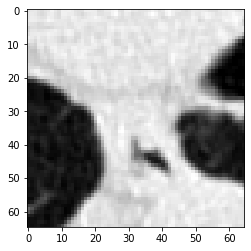

[-131.87 -141.68   16.66]
[170.29444896 263.75405382 270.48762958]
[[0.755      0.77071429 0.77428571 ... 0.76857143 0.64214286 0.47071429]
 [0.81357143 0.825      0.82785714 ... 0.76928571 0.67357143 0.49285714]
 [0.76071429 0.79571429 0.79071429 ... 0.69642857 0.64142857 0.50285714]
 ...
 [0.08357143 0.14214286 0.08142857 ... 0.105      0.13571429 0.14214286]
 [0.04714286 0.11642857 0.13857143 ... 0.125      0.15142857 0.12428571]
 [0.05714286 0.12       0.17428571 ... 0.09785714 0.10071429 0.08      ]]


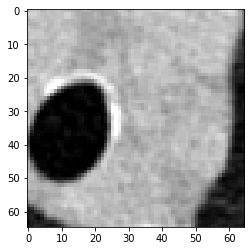

[-228.87 -255.68   41.66]
[116.40555864  86.88132655 309.27550836]
[[0.67642857 0.72785714 0.765      ... 0.72       0.70214286 0.70857143]
 [0.68357143 0.72214286 0.75928571 ... 0.75857143 0.74642857 0.735     ]
 [0.69071429 0.72857143 0.74571429 ... 0.775      0.77       0.75785714]
 ...
 [0.68642857 0.665      0.68714286 ... 0.04642857 0.04571429 0.05571429]
 [0.72642857 0.70642857 0.70642857 ... 0.05357143 0.04214286 0.05428571]
 [0.76928571 0.74071429 0.71142857 ... 0.08571429 0.07642857 0.06571429]]


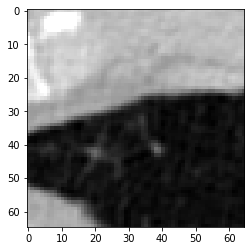

[-357.2227349   -71.01565563  -54.41899265]
[ 45.09848181 373.39085478 160.20749552]
[[0.16285714 0.09285714 0.08785714 ... 0.14214286 0.07214286 0.045     ]
 [0.12928571 0.08642857 0.1        ... 0.19642857 0.16142857 0.08642857]
 [0.08642857 0.09       0.12071429 ... 0.16071429 0.18785714 0.11428571]
 ...
 [0.62714286 0.64642857 0.675      ... 0.72428571 0.73071429 0.79142857]
 [0.65928571 0.65428571 0.655      ... 0.76714286 0.77928571 0.80214286]
 [0.70642857 0.69142857 0.66642857 ... 0.79428571 0.785      0.74785714]]


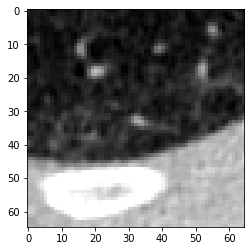

[-312.687624    -74.17181509   97.87721465]
[ 69.84021074 368.49402556 396.49736867]
[[0.03071429 0.05642857 0.06714286 ... 0.13285714 0.12714286 0.135     ]
 [0.03       0.04714286 0.07714286 ... 0.155      0.16214286 0.15714286]
 [0.04       0.04571429 0.06785714 ... 0.15928571 0.17428571 0.15785714]
 ...
 [0.74642857 0.77285714 0.80857143 ... 0.62928571 0.62928571 0.62642857]
 [0.77571429 0.80071429 0.82285714 ... 0.60142857 0.61571429 0.63142857]
 [0.74714286 0.73071429 0.74214286 ... 0.62357143 0.62928571 0.65071429]]


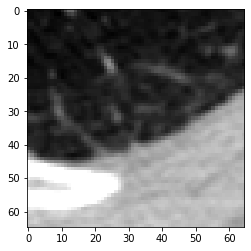

[-230.9272061  -196.7413826   -75.83821198]
[115.26266633 178.32548445 126.9752522 ]
[[0.06357143 0.055      0.06428571 ... 0.09142857 0.085      0.08785714]
 [0.05       0.07642857 0.08857143 ... 0.13857143 0.11928571 0.09214286]
 [0.05       0.07785714 0.07071429 ... 0.135      0.12642857 0.09428571]
 ...
 [0.04428571 0.05428571 0.03785714 ... 0.04928571 0.03285714 0.03357143]
 [0.075      0.07714286 0.055      ... 0.05642857 0.04142857 0.03928571]
 [0.08857143 0.08285714 0.06142857 ... 0.07142857 0.065      0.07      ]]


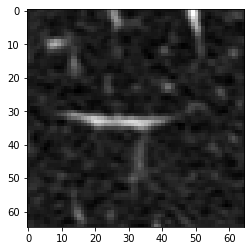

[-270.46 -107.08   93.15]
[ 93.30000247 317.43647806 389.16302352]
[[0.67785714 0.73428571 0.75142857 ... 0.06642857 0.05428571 0.06142857]
 [0.705      0.74285714 0.76857143 ... 0.05642857 0.04428571 0.055     ]
 [0.70571429 0.71285714 0.72214286 ... 0.07571429 0.06       0.065     ]
 ...
 [0.07785714 0.08357143 0.09428571 ... 0.09071429 0.10714286 0.11214286]
 [0.10928571 0.10357143 0.07714286 ... 0.11357143 0.10571429 0.09142857]
 [0.08357143 0.10428571 0.08928571 ... 0.10571429 0.09       0.08357143]]


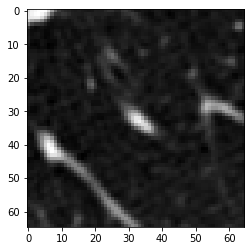

[-379.0117024   -85.15450589  102.7361466 ]
[ 32.99349954 351.45421438 404.03607521]
[[0.68571429 0.74428571 0.75928571 ... 0.71857143 0.56785714 0.38571429]
 [0.70428571 0.77642857 0.76071429 ... 0.55       0.38071429 0.20785714]
 [0.71642857 0.73785714 0.73642857 ... 0.31428571 0.17       0.11428571]
 ...
 [0.73357143 0.8        0.77285714 ... 0.65571429 0.55857143 0.58642857]
 [0.75142857 0.78642857 0.73714286 ... 0.7        0.62642857 0.62214286]
 [0.70785714 0.69571429 0.71285714 ... 0.65714286 0.635      0.65428571]]


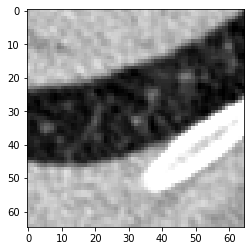

[-213.5941957  -159.9347499    58.04957873]
[124.89211681 235.43153276 334.70418809]
[[0.68642857 0.71571429 0.72928571 ... 0.08857143 0.05071429 0.05428571]
 [0.72357143 0.72714286 0.71928571 ... 0.09       0.06857143 0.08      ]
 [0.73714286 0.72071429 0.72071429 ... 0.06071429 0.07       0.07857143]
 ...
 [0.69428571 0.69214286 0.70428571 ... 0.02357143 0.02428571 0.03642857]
 [0.71       0.725      0.72071429 ... 0.04214286 0.03285714 0.06642857]
 [0.73071429 0.72357143 0.70928571 ... 0.1        0.07571429 0.08428571]]


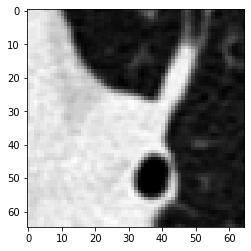

[-307.78 -128.34   52.91]
[ 72.56666859 284.45126594 326.73005382]
[[0.03214286 0.07642857 0.08071429 ... 0.13285714 0.06571429 0.02285714]
 [0.05785714 0.10928571 0.13642857 ... 0.14642857 0.085      0.02785714]
 [0.04142857 0.11571429 0.17142857 ... 0.16214286 0.13214286 0.06071429]
 ...
 [0.68642857 0.68928571 0.65142857 ... 0.03071429 0.06857143 0.13      ]
 [0.64357143 0.67357143 0.63285714 ... 0.05857143 0.07071429 0.15142857]
 [0.61857143 0.65714286 0.655      ... 0.135      0.12       0.17571429]]


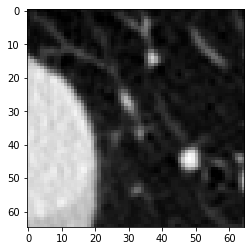

[-174.33 -130.68   46.74]
[146.70555944 280.82072048 317.15720533]
[[0.72928571 0.73714286 0.78357143 ... 0.05928571 0.06142857 0.05714286]
 [0.74571429 0.75428571 0.78857143 ... 0.03857143 0.03642857 0.03428571]
 [0.74714286 0.74857143 0.76428571 ... 0.02071429 0.02428571 0.05357143]
 ...
 [0.66928571 0.705      0.72       ... 0.1        0.08857143 0.07285714]
 [0.68142857 0.69357143 0.70785714 ... 0.07285714 0.07071429 0.08357143]
 [0.68357143 0.67928571 0.70071429 ... 0.06785714 0.07428571 0.08714286]]


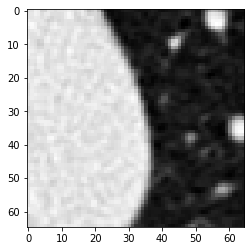

[-205.3220589 -128.0429028  108.7191463]
[129.48774849 284.91221675 413.3187899 ]
[[0.58071429 0.43142857 0.26714286 ... 0.035      0.04642857 0.05714286]
 [0.62214286 0.50071429 0.38214286 ... 0.06571429 0.07928571 0.09928571]
 [0.50357143 0.45428571 0.39357143 ... 0.09928571 0.07785714 0.08071429]
 ...
 [0.10071429 0.09928571 0.08714286 ... 0.10071429 0.05142857 0.03428571]
 [0.13142857 0.11642857 0.10642857 ... 0.07857143 0.04357143 0.05214286]
 [0.12214286 0.12071429 0.13357143 ... 0.04       0.04357143 0.05642857]]


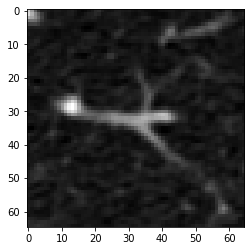

[-264.84 -100.78  -25.95]
[ 96.42222478 327.21102352 204.37756897]
[[0.06285714 0.05785714 0.22142857 ... 0.07571429 0.08214286 0.11      ]
 [0.04       0.04       0.14428571 ... 0.07571429 0.05571429 0.08571429]
 [0.02214286 0.03142857 0.075      ... 0.09857143 0.065      0.06714286]
 ...
 [0.03214286 0.04214286 0.06642857 ... 0.615      0.65785714 0.70142857]
 [0.05       0.065      0.06357143 ... 0.65928571 0.69214286 0.72071429]
 [0.08428571 0.09785714 0.08642857 ... 0.69214286 0.73285714 0.75428571]]


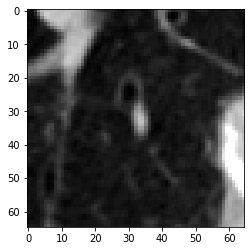

[-284.9521263  -123.1546309    65.27843864]
[ 85.24882098 292.49644466 345.91987377]
[[0.02071429 0.02928571 0.07857143 ... 0.09357143 0.07214286 0.03071429]
 [0.02642857 0.02214286 0.04642857 ... 0.08928571 0.08       0.04714286]
 [0.03       0.01571429 0.01928571 ... 0.05571429 0.06357143 0.07285714]
 ...
 [0.75214286 0.76857143 0.75428571 ... 0.085      0.09214286 0.08642857]
 [0.75857143 0.76571429 0.74857143 ... 0.08571429 0.10285714 0.09285714]
 [0.77642857 0.76428571 0.74142857 ... 0.06642857 0.07857143 0.08214286]]


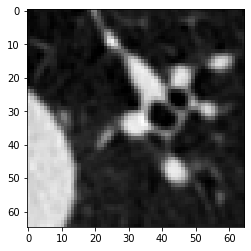

[-261.865 -168.49    79.965]
[ 98.0750026  222.15793261 368.70629624]
[[0.75071429 0.75357143 0.74785714 ... 0.08857143 0.08857143 0.09071429]
 [0.77071429 0.76357143 0.74642857 ... 0.09285714 0.09357143 0.07142857]
 [0.75357143 0.74785714 0.75571429 ... 0.06928571 0.08357143 0.08428571]
 ...
 [0.06642857 0.04928571 0.04714286 ... 0.04214286 0.03285714 0.04928571]
 [0.02357143 0.02642857 0.05642857 ... 0.04428571 0.05357143 0.08357143]
 [0.065      0.06714286 0.08214286 ... 0.04928571 0.06785714 0.08357143]]


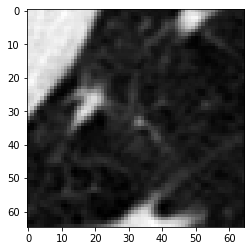

[-230.2  -221.14  -38.29]
[115.66666973 140.47065988 185.231872  ]
[[0.03       0.04928571 0.07857143 ... 0.03142857 0.05642857 0.06571429]
 [0.05214286 0.05642857 0.08214286 ... 0.03214286 0.05928571 0.05142857]
 [0.05571429 0.06357143 0.09357143 ... 0.02714286 0.04857143 0.04714286]
 ...
 [0.12714286 0.07285714 0.04857143 ... 0.74428571 0.75       0.72785714]
 [0.13642857 0.07785714 0.04142857 ... 0.75357143 0.74785714 0.73857143]
 [0.10857143 0.08785714 0.05857143 ... 0.77428571 0.765      0.73214286]]


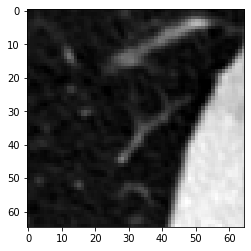

[-295.2   -92.88 -108.68]
[ 79.55555766 339.46799321  76.02072048]
[[0.30785714 0.12642857 0.06571429 ... 0.645      0.73071429 0.66785714]
 [0.37857143 0.16071429 0.08428571 ... 0.63142857 0.66857143 0.53      ]
 [0.47071429 0.20928571 0.07571429 ... 0.61214286 0.57928571 0.37428571]
 ...
 [0.75857143 0.72357143 0.71357143 ... 0.16571429 0.16285714 0.16071429]
 [0.71857143 0.72428571 0.74214286 ... 0.18428571 0.18071429 0.17357143]
 [0.68214286 0.72571429 0.76071429 ... 0.20785714 0.18       0.185     ]]


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv')
print(count)